<a href="https://colab.research.google.com/gist/ronxldwilson/04199878edbb7fe37369706a4166cab4/silly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shell.ai Hackathon 2025 - Fuel Blend Properties Prediction
# Phase 1: Data Understanding & Exploration

# Install required packages

In [1]:

!pip install pandas numpy matplotlib seaborn plotly scikit-learn


=== Shell.ai Hackathon 2025 - Fuel Blend Properties Prediction ===
Phase 1: Data Understanding & Exploration
Please upload your dataset files...
Expected files: train.csv, test.csv, sample_submission.csv
--------------------------------------------------
✅ All files loaded successfully!

DATASET STRUCTURE OVERVIEW
Train Dataset Shape: (2000, 65)
Test Dataset Shape: (500, 56)
Sample Submission Shape: (500, 11)

Train Dataset Info:
- Expected: 65 columns (5 blend + 50 component + 10 targets)
- Actual: 65 columns
- Rows: 2,000

Test Dataset Info:
- Expected: 55 columns (5 blend + 50 component, no targets)
- Actual: 56 columns
- Rows: 500

----------------------------------------
FIRST 5 ROWS OF TRAIN DATASET
----------------------------------------
   Component1_fraction  Component2_fraction  Component3_fraction  \
0                 0.21                 0.00                 0.42   
1                 0.02                 0.33                 0.19   
2                 0.08                 0

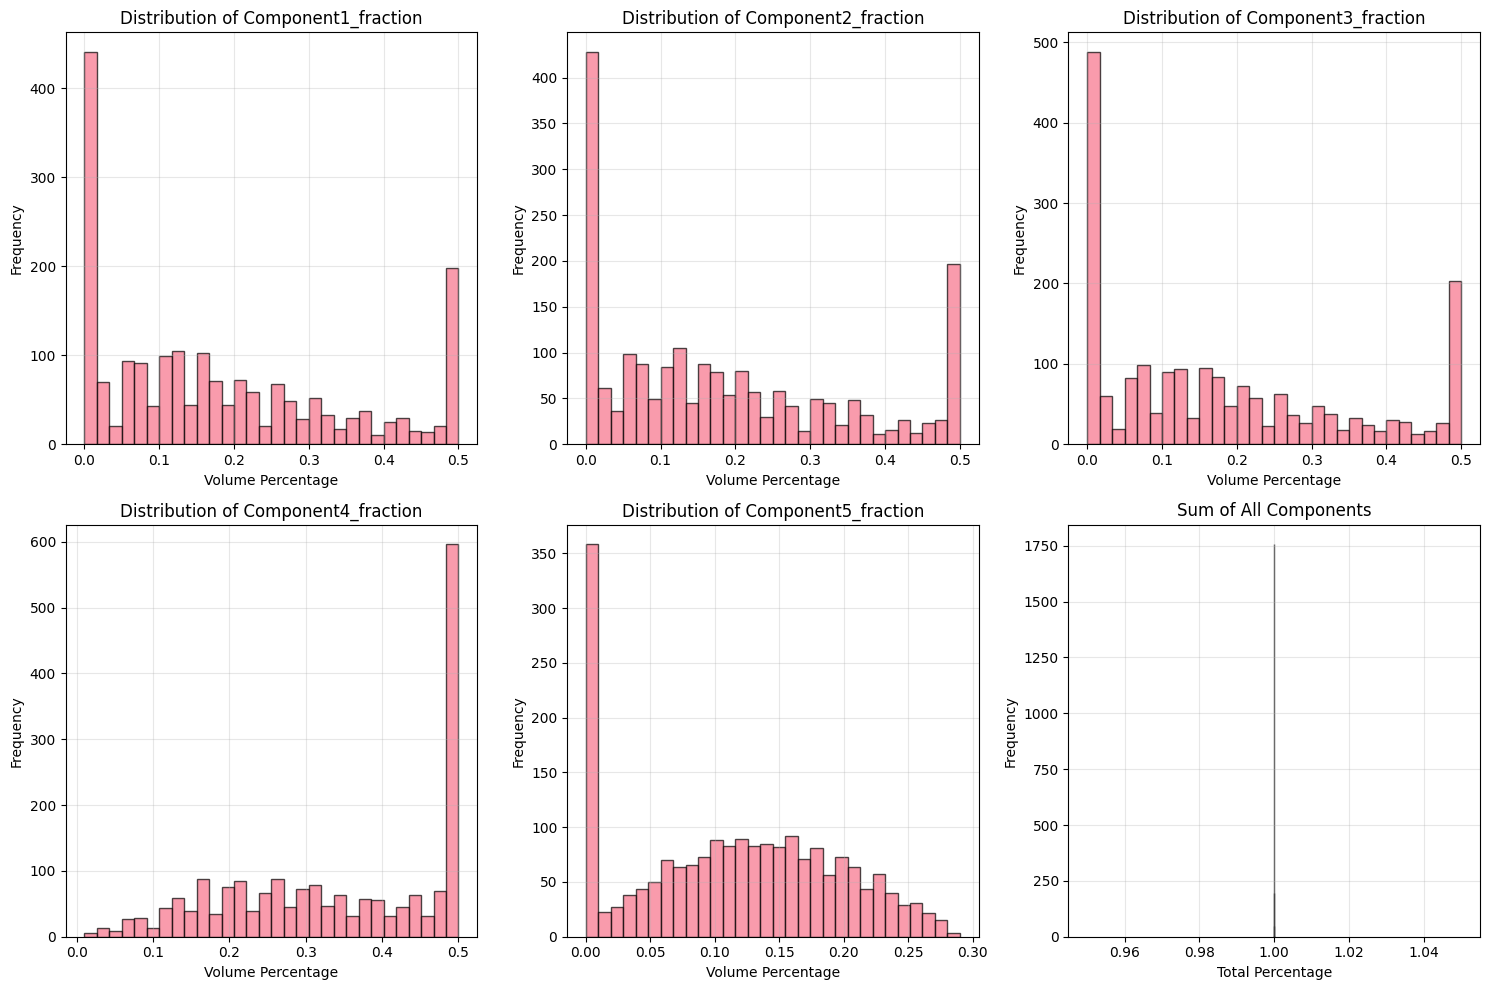


----------------------------------------
COMPONENT USAGE PATTERNS
----------------------------------------
Component1_fraction:
  - Used in 1,582 blends (79.1%)
  - Not used in 418 blends (20.9%)
  - Mean when used: 0.23%
Component2_fraction:
  - Used in 1,592 blends (79.6%)
  - Not used in 408 blends (20.4%)
  - Mean when used: 0.23%
Component3_fraction:
  - Used in 1,538 blends (76.9%)
  - Not used in 462 blends (23.1%)
  - Mean when used: 0.23%
Component4_fraction:
  - Used in 2,000 blends (100.0%)
  - Not used in 0 blends (0.0%)
  - Mean when used: 0.34%
Component5_fraction:
  - Used in 1,642 blends (82.1%)
  - Not used in 358 blends (17.9%)
  - Mean when used: 0.14%

COMPONENT PROPERTIES EXPLORATION
Component Properties: 50 columns
Structure: 5 components × 10 properties each

Found 5 components:
- Component1: 10 properties
- Component2: 10 properties
- Component3: 10 properties
- Component4: 10 properties
- Component5: 10 properties

----------------------------------------
PROP

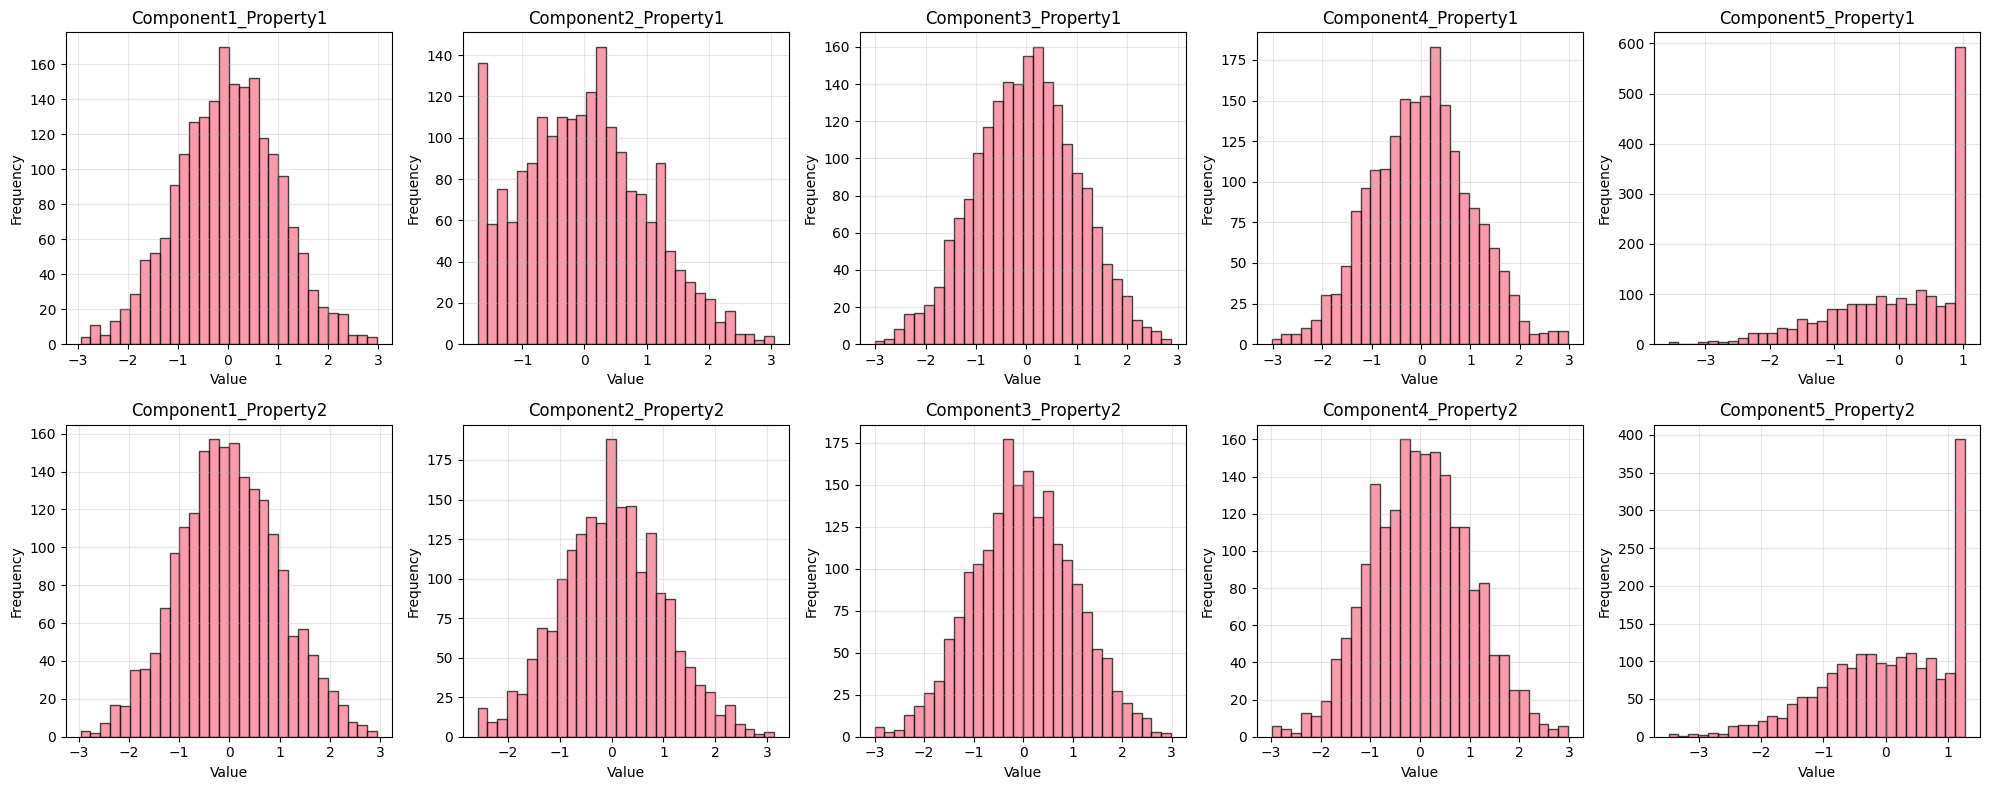


TARGET VARIABLES ANALYSIS
Target Variables (Blend Properties):
 1. BlendProperty1
 2. BlendProperty2
 3. BlendProperty3
 4. BlendProperty4
 5. BlendProperty5
 6. BlendProperty6
 7. BlendProperty7
 8. BlendProperty8
 9. BlendProperty9
10. BlendProperty10

----------------------------------------
TARGET STATISTICS
----------------------------------------
       BlendProperty1  BlendProperty2  BlendProperty3  BlendProperty4  \
count     2000.000000     2000.000000     2000.000000     2000.000000   
mean        -0.016879       -0.002076       -0.014351       -0.006068   
std          0.993787        1.004512        0.999360        1.009176   
min         -2.550897       -3.079759       -3.041624       -2.835701   
25%         -0.766128       -0.735109       -0.624235       -0.783547   
50%         -0.021089        0.001684        0.146135       -0.028158   
75%          0.714763        0.723807        0.727597        0.664659   
max          2.856588        2.769156        1.638646       

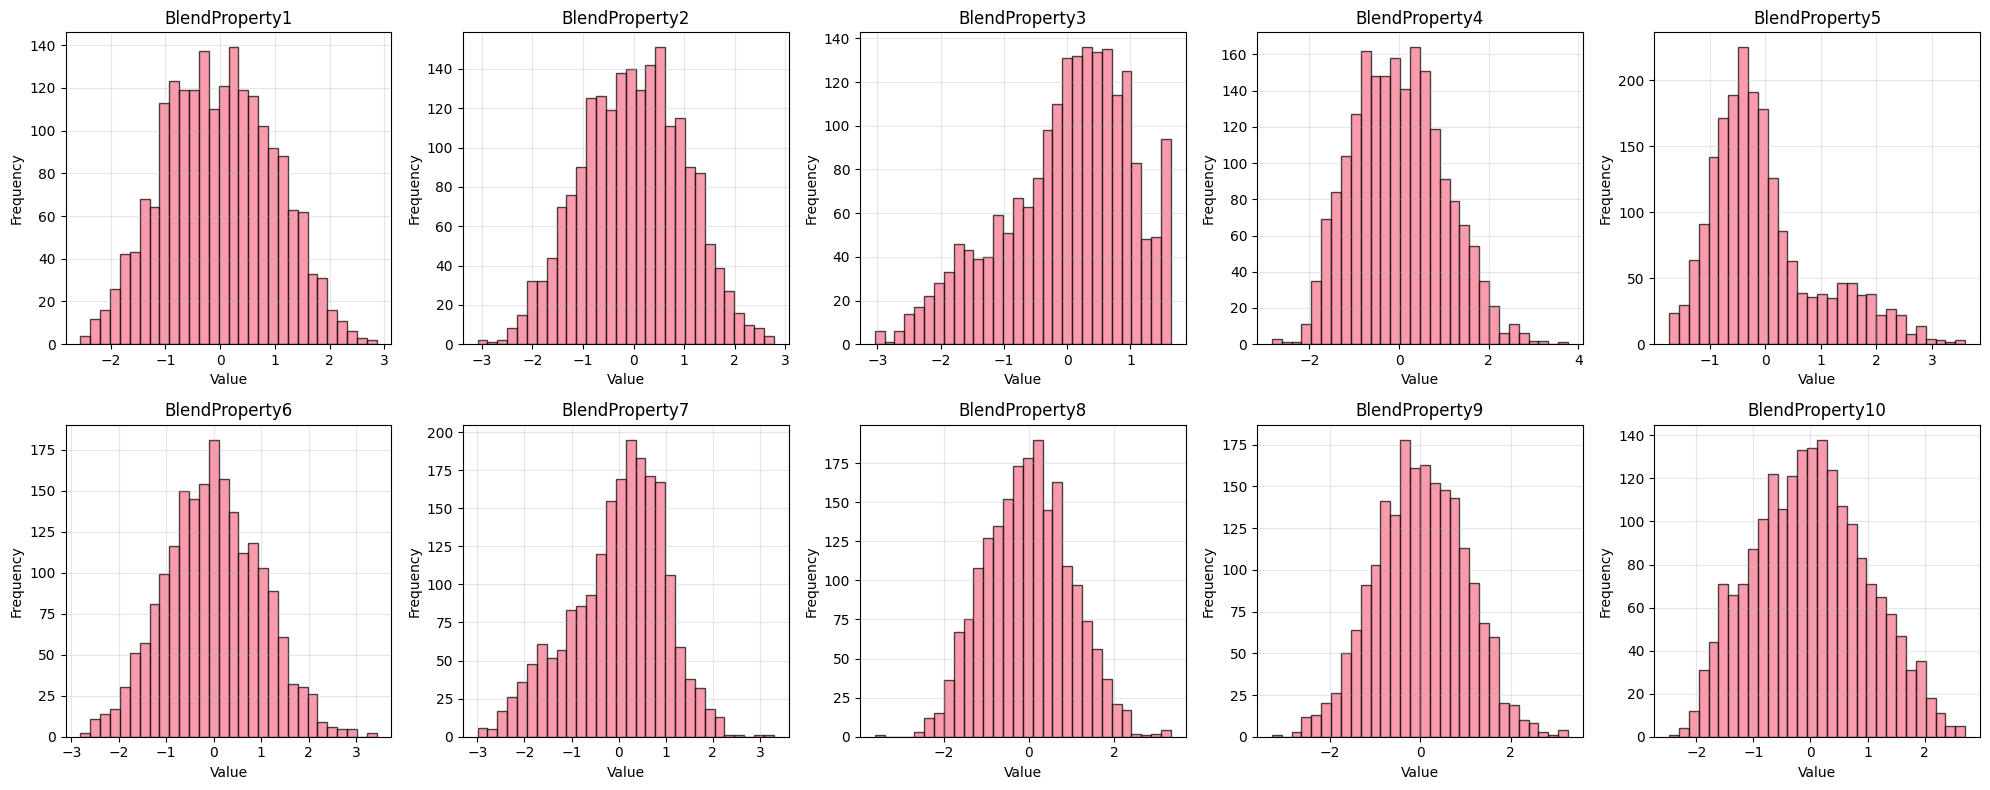


----------------------------------------
TARGET VARIABLE CORRELATIONS
----------------------------------------
                 BlendProperty1  BlendProperty2  BlendProperty3  \
BlendProperty1         1.000000        0.726115        0.451207   
BlendProperty2         0.726115        1.000000        0.431597   
BlendProperty3         0.451207        0.431597        1.000000   
BlendProperty4         0.742979        0.706317        0.432625   
BlendProperty5         0.154810        0.124643        0.374290   
BlendProperty6         0.637866        0.638396        0.415293   
BlendProperty7         0.450704        0.432767        0.997246   
BlendProperty8         0.644980        0.642155        0.627322   
BlendProperty9         0.597190        0.603799        0.179044   
BlendProperty10        0.380908        0.284212        0.512494   

                 BlendProperty4  BlendProperty5  BlendProperty6  \
BlendProperty1         0.742979        0.154810        0.637866   
BlendProperty2  

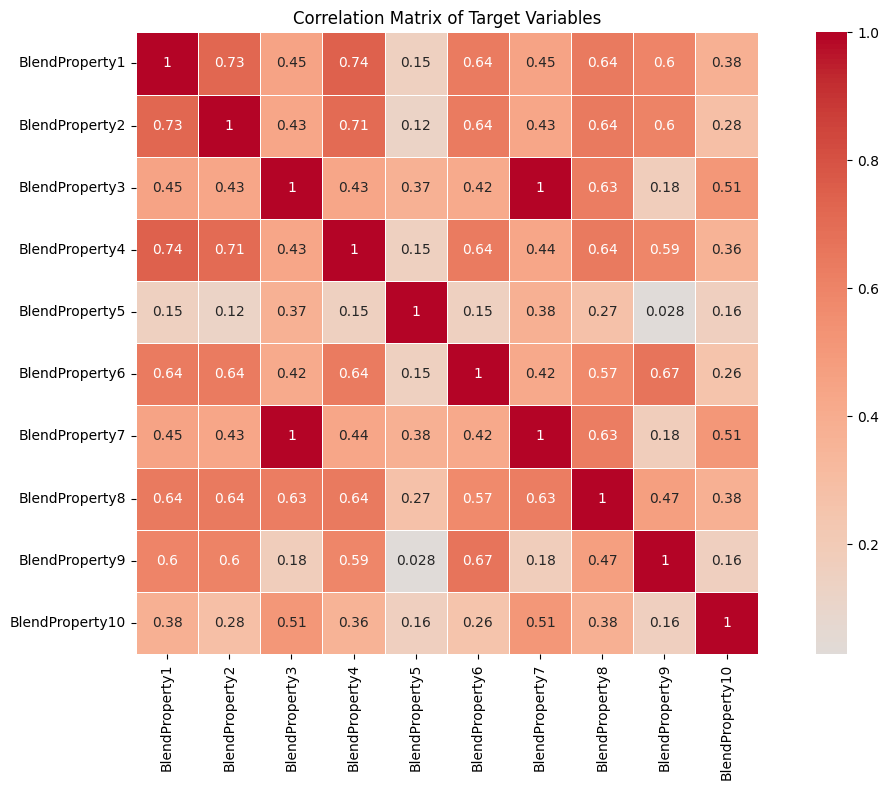


FEATURE-TARGET RELATIONSHIPS
Blend Composition vs Target Correlations:
---------------------------------------------
                     BlendProperty1  BlendProperty2  BlendProperty3  \
Component1_fraction       -0.002922       -0.132811        0.146851   
Component2_fraction       -0.421138       -0.376133       -0.838017   
Component3_fraction        0.282358        0.436292        0.497568   
Component4_fraction       -0.203952       -0.282413        0.239268   
Component5_fraction        0.638858        0.630209       -0.040909   

                     BlendProperty4  BlendProperty5  BlendProperty6  \
Component1_fraction       -0.051559        0.215086       -0.042236   
Component2_fraction       -0.396772       -0.461797       -0.384576   
Component3_fraction        0.331242        0.214809        0.367638   
Component4_fraction       -0.234551        0.065840       -0.245710   
Component5_fraction        0.640581       -0.056278        0.540913   

                     BlendPr

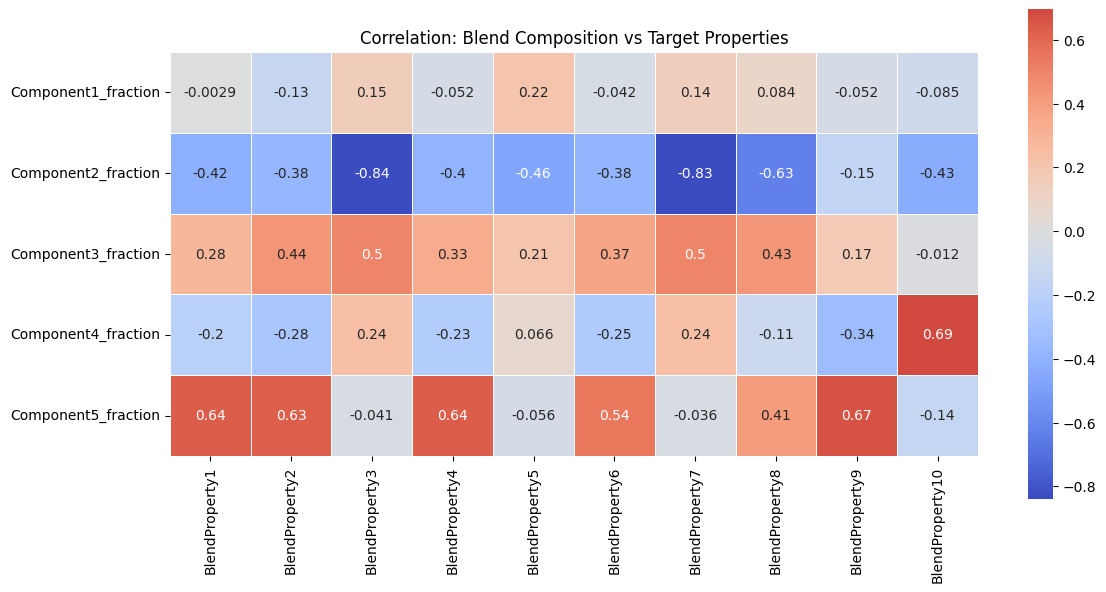


----------------------------------------
COMPONENT PROPERTIES VS TARGETS (Sample)
----------------------------------------
Component1 Properties vs Targets:
                       BlendProperty1  BlendProperty2  BlendProperty3  \
Component1_Property1         0.161641        0.001764       -0.015975   
Component1_Property2        -0.017259        0.121901        0.005440   
Component1_Property3        -0.039016       -0.007332       -0.034780   
Component1_Property4         0.043072        0.022467        0.029531   
Component1_Property5         0.014989        0.025762        0.034933   
Component1_Property6         0.002990        0.010036       -0.002506   
Component1_Property7        -0.007232       -0.018051        0.183102   
Component1_Property8         0.049081        0.047772        0.073542   
Component1_Property9         0.014288        0.015658        0.003850   
Component1_Property10       -0.038085       -0.033202       -0.000051   

                       BlendProperty4 

In [13]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("=== Shell.ai Hackathon 2025 - Fuel Blend Properties Prediction ===")
print("Phase 1: Data Understanding & Exploration")
print("=" * 60)

# ==========================================
# 1. DATA LOADING & BASIC STRUCTURE
# ==========================================

# Upload files to Colab
from google.colab import files
print("Please upload your dataset files...")
print("Expected files: train.csv, test.csv, sample_submission.csv")
print("-" * 50)

# Uncomment the lines below to upload files
# uploaded = files.upload()

# Load datasets (modify paths as needed)
# For now, let's assume files are uploaded to the current directory
try:
    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')
    sample_solution = pd.read_csv('sample_solution.csv')
    print("✅ All files loaded successfully!")
except FileNotFoundError as e:
    print(f"❌ File not found: {e}")
    print("Please ensure all files are uploaded and named correctly.")
    print("Alternative: Upload files manually and update file paths below")

    # Manual file path specification (update these paths)
    # train_df = pd.read_csv('/content/train.csv')
    # test_df = pd.read_csv('/content/test.csv')
    # sample_submission = pd.read_csv('/content/sample_submission.csv')

print("\n" + "=" * 60)
print("DATASET STRUCTURE OVERVIEW")
print("=" * 60)

# Basic dataset information
print(f"Train Dataset Shape: {train_df.shape}")
print(f"Test Dataset Shape: {test_df.shape}")
print(f"Sample Submission Shape: {sample_solution.shape}")

print(f"\nTrain Dataset Info:")
print(f"- Expected: 65 columns (5 blend + 50 component + 10 targets)")
print(f"- Actual: {train_df.shape[1]} columns")
print(f"- Rows: {train_df.shape[0]:,}")

print(f"\nTest Dataset Info:")
print(f"- Expected: 55 columns (5 blend + 50 component, no targets)")
print(f"- Actual: {test_df.shape[1]} columns")
print(f"- Rows: {test_df.shape[0]:,}")

# Display first few rows
print("\n" + "-" * 40)
print("FIRST 5 ROWS OF TRAIN DATASET")
print("-" * 40)
print(train_df.head())

print("\n" + "-" * 40)
print("COLUMN NAMES STRUCTURE")
print("-" * 40)
print("All columns in train dataset:")
for i, col in enumerate(train_df.columns):
    print(f"{i+1:2d}. {col}")

# ==========================================
# 2. DATA QUALITY ASSESSMENT
# ==========================================

print("\n" + "=" * 60)
print("DATA QUALITY ASSESSMENT")
print("=" * 60)

# Missing values analysis
print("Missing Values Analysis:")
print("-" * 30)
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

print("Train Dataset Missing Values:")
print(missing_train[missing_train > 0])
if missing_train.sum() == 0:
    print("✅ No missing values in training data!")

print("\nTest Dataset Missing Values:")
print(missing_test[missing_test > 0])
if missing_test.sum() == 0:
    print("✅ No missing values in test data!")

# Basic statistics
print("\n" + "-" * 40)
print("BASIC STATISTICS")
print("-" * 40)
print(train_df.describe())

# Data types
print("\n" + "-" * 40)
print("DATA TYPES")
print("-" * 40)
print(train_df.dtypes.value_counts())

# ==========================================
# 3. BLEND COMPOSITION ANALYSIS
# ==========================================

print("\n" + "=" * 60)
print("BLEND COMPOSITION ANALYSIS")
print("=" * 60)

# Identify blend composition columns (first 5 columns)
blend_cols = train_df.columns[:5].tolist()
print("Blend Composition Columns:")
for i, col in enumerate(blend_cols):
    print(f"{i+1}. {col}")

# Check if blend compositions sum to 100%
blend_sums = train_df[blend_cols].sum(axis=1)
print(f"\nBlend Composition Validation:")
print(f"- Mean sum: {blend_sums.mean():.4f}")
print(f"- Min sum: {blend_sums.min():.4f}")
print(f"- Max sum: {blend_sums.max():.4f}")
print(f"- Std sum: {blend_sums.std():.4f}")

if np.allclose(blend_sums, 100.0, atol=1e-6):
    print("✅ All blends sum to 100%!")
else:
    print("⚠️  Some blends don't sum to exactly 100%")

# Visualize blend compositions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(blend_cols):
    axes[i].hist(train_df[col], bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Volume Percentage')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

# Sum distribution
axes[5].hist(blend_sums, bins=30, alpha=0.7, edgecolor='black', color='red')
axes[5].set_title('Sum of All Components')
axes[5].set_xlabel('Total Percentage')
axes[5].set_ylabel('Frequency')
axes[5].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Component usage patterns
print("\n" + "-" * 40)
print("COMPONENT USAGE PATTERNS")
print("-" * 40)

for col in blend_cols:
    non_zero = (train_df[col] > 0).sum()
    zero_count = (train_df[col] == 0).sum()
    print(f"{col}:")
    print(f"  - Used in {non_zero:,} blends ({non_zero/len(train_df)*100:.1f}%)")
    print(f"  - Not used in {zero_count:,} blends ({zero_count/len(train_df)*100:.1f}%)")
    print(f"  - Mean when used: {train_df[train_df[col] > 0][col].mean():.2f}%")

# ==========================================
# 4. COMPONENT PROPERTIES EXPLORATION
# ==========================================

print("\n" + "=" * 60)
print("COMPONENT PROPERTIES EXPLORATION")
print("=" * 60)

# Identify component property columns (columns 6-55)
component_cols = train_df.columns[5:55].tolist()
print(f"Component Properties: {len(component_cols)} columns")
print("Structure: 5 components × 10 properties each")

# Parse component and property structure
component_props = {}
for col in component_cols:
    parts = col.split('_')
    if len(parts) == 2:
        component = parts[0]
        property_name = parts[1]
        if component not in component_props:
            component_props[component] = []
        component_props[component].append(property_name)

print(f"\nFound {len(component_props)} components:")
for comp, props in component_props.items():
    print(f"- {comp}: {len(props)} properties")

# Property statistics across components
print("\n" + "-" * 40)
print("PROPERTY STATISTICS BY COMPONENT")
print("-" * 40)

for comp in component_props.keys():
    comp_cols = [col for col in component_cols if col.startswith(comp)]
    print(f"\n{comp} Properties:")
    print(train_df[comp_cols].describe())

# Visualize property distributions
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

# Sample 10 properties for visualization
sample_props = component_cols[:10]
for i, col in enumerate(sample_props):
    axes[i].hist(train_df[col], bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==========================================
# 5. TARGET VARIABLES ANALYSIS
# ==========================================

print("\n" + "=" * 60)
print("TARGET VARIABLES ANALYSIS")
print("=" * 60)

# Identify target columns (last 10 columns)
target_cols = train_df.columns[-10:].tolist()
print("Target Variables (Blend Properties):")
for i, col in enumerate(target_cols):
    print(f"{i+1:2d}. {col}")

# Target statistics
print("\n" + "-" * 40)
print("TARGET STATISTICS")
print("-" * 40)
print(train_df[target_cols].describe())

# Visualize target distributions
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(target_cols):
    axes[i].hist(train_df[col], bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Target correlations
print("\n" + "-" * 40)
print("TARGET VARIABLE CORRELATIONS")
print("-" * 40)

target_corr = train_df[target_cols].corr()
print(target_corr)

# Visualize target correlations
plt.figure(figsize=(12, 8))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Target Variables')
plt.tight_layout()
plt.show()

# ==========================================
# 6. FEATURE-TARGET RELATIONSHIPS
# ==========================================

print("\n" + "=" * 60)
print("FEATURE-TARGET RELATIONSHIPS")
print("=" * 60)

# Correlation between blend composition and targets
print("Blend Composition vs Target Correlations:")
print("-" * 45)
blend_target_corr = train_df[blend_cols + target_cols].corr()
blend_target_cross = blend_target_corr.loc[blend_cols, target_cols]
print(blend_target_cross)

# Visualize blend-target correlations
plt.figure(figsize=(12, 6))
sns.heatmap(blend_target_cross, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation: Blend Composition vs Target Properties')
plt.tight_layout()
plt.show()

# Component properties vs targets (sample analysis)
print("\n" + "-" * 40)
print("COMPONENT PROPERTIES VS TARGETS (Sample)")
print("-" * 40)

# Calculate correlations for first component's properties
comp1_cols = [col for col in component_cols if col.startswith('Component1')]
comp1_target_corr = train_df[comp1_cols + target_cols].corr()
comp1_target_cross = comp1_target_corr.loc[comp1_cols, target_cols]
print("Component1 Properties vs Targets:")
print(comp1_target_cross)

# ==========================================
# 7. OUTLIER DETECTION
# ==========================================

print("\n" + "=" * 60)
print("OUTLIER DETECTION")
print("=" * 60)

def detect_outliers_iqr(df, columns):
    """Detect outliers using IQR method"""
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers[col] = outlier_mask.sum()

    return outliers

# Detect outliers in targets
target_outliers = detect_outliers_iqr(train_df, target_cols)
print("Outliers in Target Variables (IQR method):")
for col, count in target_outliers.items():
    print(f"{col}: {count} outliers ({count/len(train_df)*100:.2f}%)")

# Detect outliers in blend composition
blend_outliers = detect_outliers_iqr(train_df, blend_cols)
print("\nOutliers in Blend Composition:")
for col, count in blend_outliers.items():
    print(f"{col}: {count} outliers ({count/len(train_df)*100:.2f}%)")

# ==========================================
# 8. SUMMARY INSIGHTS
# ==========================================

print("\n" + "=" * 60)
print("SUMMARY INSIGHTS & RECOMMENDATIONS")
print("=" * 60)

print("📊 DATA STRUCTURE:")
print(f"- Training samples: {train_df.shape[0]:,}")
print(f"- Test samples: {test_df.shape[0]:,}")
print(f"- Input features: {train_df.shape[1] - 10} (5 blend + 50 component properties)")
print(f"- Target variables: 10 blend properties")

print("\n🔍 KEY FINDINGS:")
print("- Blend compositions:", "✅ Sum to 100%" if np.allclose(blend_sums, 100.0, atol=1e-6) else "⚠️ Don't sum to 100%")
print("- Missing values:", "✅ None found" if train_df.isnull().sum().sum() == 0 else "⚠️ Present")
print("- Data quality:", "✅ All numeric" if train_df.select_dtypes(include=[np.number]).shape[1] == train_df.shape[1] else "⚠️ Mixed types")

print("\n🎯 MODELING RECOMMENDATIONS:")
print("1. Consider multi-output regression (10 targets simultaneously)")
print("2. Engineer interaction features between components")
print("3. Create weighted features (component_property × volume_fraction)")
print("4. Use ensemble methods for complex non-linear relationships")
print("5. Implement proper cross-validation strategy")

print("\n🔄 NEXT STEPS:")
print("1. Feature engineering (Phase 2)")
print("2. Baseline model development (Phase 3)")
print("3. Advanced modeling (Phase 4)")

print("\n" + "=" * 60)
print("PHASE 1 COMPLETE - DATA EXPLORATION SUMMARY")
print("=" * 60)

# Save analysis results
analysis_summary = {
    'train_shape': train_df.shape,
    'test_shape': test_df.shape,
    'blend_columns': blend_cols,
    'component_columns': component_cols,
    'target_columns': target_cols,
    'missing_values': train_df.isnull().sum().sum(),
    'blend_sum_valid': np.allclose(blend_sums, 100.0, atol=1e-6),
    'target_correlations': target_corr,
    'blend_target_correlations': blend_target_cross
}

print("Analysis summary saved to 'analysis_summary' dictionary")
print("Ready for Phase 2: Feature Engineering!")

# Optional: Save datasets for easy access
# train_df.to_csv('train_processed.csv', index=False)
# test_df.to_csv('test_processed.csv', index=False)

In [14]:
print(analysis_summary)

{'train_shape': (2000, 65), 'test_shape': (500, 56), 'blend_columns': ['Component1_fraction', 'Component2_fraction', 'Component3_fraction', 'Component4_fraction', 'Component5_fraction'], 'component_columns': ['Component1_Property1', 'Component2_Property1', 'Component3_Property1', 'Component4_Property1', 'Component5_Property1', 'Component1_Property2', 'Component2_Property2', 'Component3_Property2', 'Component4_Property2', 'Component5_Property2', 'Component1_Property3', 'Component2_Property3', 'Component3_Property3', 'Component4_Property3', 'Component5_Property3', 'Component1_Property4', 'Component2_Property4', 'Component3_Property4', 'Component4_Property4', 'Component5_Property4', 'Component1_Property5', 'Component2_Property5', 'Component3_Property5', 'Component4_Property5', 'Component5_Property5', 'Component1_Property6', 'Component2_Property6', 'Component3_Property6', 'Component4_Property6', 'Component5_Property6', 'Component1_Property7', 'Component2_Property7', 'Component3_Property7',

Phase 2

In [15]:
# Shell.ai Hackathon 2025 - Fuel Blend Properties Prediction
# Phase 2: Feature Engineering & Data Preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

print("=== Shell.ai Hackathon 2025 - Phase 2: Feature Engineering ===")
print("=" * 65)

# Load your datasets (assuming they're already loaded from Phase 1)
# If not, uncomment and run:
# train_df = pd.read_csv('train.csv')
# test_df = pd.read_csv('test.csv')

# ==========================================
# 1. BLEND COMPOSITION NORMALIZATION
# ==========================================

print("1. BLEND COMPOSITION ANALYSIS & NORMALIZATION")
print("=" * 50)

# Identify columns
blend_cols = [col for col in train_df.columns if 'fraction' in col.lower() or col.startswith('Component') and not '_' in col]
if not blend_cols:
    # Fallback: assume first 5 columns are blend composition
    blend_cols = train_df.columns[:5].tolist()

component_cols = [col for col in train_df.columns if '_' in col and not col.startswith('Blend')]
target_cols = [col for col in train_df.columns if col.startswith('Blend')]

print(f"Blend columns: {blend_cols}")
print(f"Component property columns: {len(component_cols)}")
print(f"Target columns: {len(target_cols)}")

# Analyze blend composition sums
train_blend_sums = train_df[blend_cols].sum(axis=1)
test_blend_sums = test_df[blend_cols].sum(axis=1)

print(f"\nBlend Composition Sum Analysis:")
print(f"Train - Min: {train_blend_sums.min():.4f}, Max: {train_blend_sums.max():.4f}, Mean: {train_blend_sums.mean():.4f}")
print(f"Test - Min: {test_blend_sums.min():.4f}, Max: {test_blend_sums.max():.4f}, Mean: {test_blend_sums.mean():.4f}")

# Normalize blend compositions to sum to 100%
def normalize_blend_composition(df, blend_columns):
    """Normalize blend composition to sum to 100%"""
    df_normalized = df.copy()
    blend_sums = df_normalized[blend_columns].sum(axis=1)

    # Avoid division by zero
    valid_mask = blend_sums > 0
    for col in blend_columns:
        df_normalized.loc[valid_mask, col] = df_normalized.loc[valid_mask, col] / blend_sums[valid_mask] * 100

    return df_normalized

# Apply normalization
train_df_norm = normalize_blend_composition(train_df, blend_cols)
test_df_norm = normalize_blend_composition(test_df, blend_cols)

# Verify normalization
train_norm_sums = train_df_norm[blend_cols].sum(axis=1)
test_norm_sums = test_df_norm[blend_cols].sum(axis=1)

print(f"\nAfter Normalization:")
print(f"Train - Min: {train_norm_sums.min():.4f}, Max: {train_norm_sums.max():.4f}, Mean: {train_norm_sums.mean():.4f}")
print(f"Test - Min: {test_norm_sums.min():.4f}, Max: {test_norm_sums.max():.4f}, Mean: {test_norm_sums.mean():.4f}")

# ==========================================
# 2. DOMAIN-SPECIFIC FEATURE ENGINEERING
# ==========================================

print("\n2. DOMAIN-SPECIFIC FEATURE ENGINEERING")
print("=" * 50)

def create_fuel_blend_features(df, blend_cols, component_cols):
    """Create domain-specific features for fuel blending"""
    df_features = df.copy()

    # Parse component properties structure
    components = {}
    for col in component_cols:
        if '_' in col:
            comp_name, prop_name = col.split('_', 1)
            if comp_name not in components:
                components[comp_name] = {}
            components[comp_name][prop_name] = col

    print(f"Found {len(components)} components: {list(components.keys())}")

    # 1. WEIGHTED COMPONENT PROPERTIES
    print("Creating weighted component properties...")
    for comp_name, properties in components.items():
        # Find corresponding blend fraction column
        blend_col = None
        for bcol in blend_cols:
            if comp_name.lower() in bcol.lower():
                blend_col = bcol
                break

        if blend_col:
            for prop_name, prop_col in properties.items():
                # Weighted property = property_value * volume_fraction
                weighted_col = f"{comp_name}_{prop_name}_weighted"
                df_features[weighted_col] = df_features[prop_col] * df_features[blend_col] / 100

    # 2. AGGREGATE WEIGHTED PROPERTIES
    print("Creating aggregate weighted properties...")
    # Group by property type across all components
    property_names = set()
    for comp_props in components.values():
        property_names.update(comp_props.keys())

    for prop_name in property_names:
        weighted_sum = None
        weighted_avg = None
        count = 0

        for comp_name in components.keys():
            if prop_name in components[comp_name]:
                blend_col = None
                for bcol in blend_cols:
                    if comp_name.lower() in bcol.lower():
                        blend_col = bcol
                        break

                if blend_col:
                    prop_col = components[comp_name][prop_name]
                    weighted_prop = df_features[prop_col] * df_features[blend_col] / 100

                    if weighted_sum is None:
                        weighted_sum = weighted_prop
                        weighted_avg = weighted_prop
                    else:
                        weighted_sum += weighted_prop
                        weighted_avg += weighted_prop
                    count += 1

        if weighted_sum is not None:
            df_features[f"Total_{prop_name}"] = weighted_sum
            df_features[f"Avg_{prop_name}"] = weighted_avg / count

    # 3. COMPONENT INTERACTION FEATURES
    print("Creating component interaction features...")
    for i, comp1 in enumerate(components.keys()):
        for j, comp2 in enumerate(components.keys()):
            if i < j:  # Avoid duplicate pairs
                blend1 = None
                blend2 = None
                for bcol in blend_cols:
                    if comp1.lower() in bcol.lower():
                        blend1 = bcol
                    if comp2.lower() in bcol.lower():
                        blend2 = bcol

                if blend1 and blend2:
                    # Interaction term
                    interaction_col = f"{comp1}_{comp2}_interaction"
                    df_features[interaction_col] = df_features[blend1] * df_features[blend2]

                    # Ratio features
                    ratio_col = f"{comp1}_{comp2}_ratio"
                    df_features[ratio_col] = df_features[blend1] / (df_features[blend2] + 1e-8)

    # 4. BLEND COMPLEXITY FEATURES
    print("Creating blend complexity features...")
    # Number of active components
    active_components = (df_features[blend_cols] > 0).sum(axis=1)
    df_features['Active_Components'] = active_components

    # Blend entropy (measure of complexity)
    blend_entropy = np.zeros(len(df_features))
    for i, row in df_features[blend_cols].iterrows():
        probs = row.values / 100  # Convert to probabilities
        probs = probs[probs > 0]  # Remove zeros
        if len(probs) > 0:
            blend_entropy[i] = -np.sum(probs * np.log2(probs))
    df_features['Blend_Entropy'] = blend_entropy

    # Dominant component features
    df_features['Max_Component_Fraction'] = df_features[blend_cols].max(axis=1)
    df_features['Min_Component_Fraction'] = df_features[blend_cols].min(axis=1)
    df_features['Range_Component_Fraction'] = df_features['Max_Component_Fraction'] - df_features['Min_Component_Fraction']

    # 5. POLYNOMIAL FEATURES FOR KEY PROPERTIES
    print("Creating polynomial features...")
    # Focus on first few properties of each component (assumed to be most important)
    for comp_name, properties in components.items():
        prop_list = list(properties.keys())[:3]  # Take first 3 properties
        for prop_name in prop_list:
            if prop_name in properties:
                col = properties[prop_name]
                # Quadratic terms
                df_features[f"{col}_squared"] = df_features[col] ** 2
                # Log terms (with small epsilon to avoid log(0))
                df_features[f"{col}_log"] = np.log1p(np.abs(df_features[col]))

    print(f"Total features created: {df_features.shape[1] - df.shape[1]}")
    return df_features

# Apply feature engineering
print("Applying feature engineering to train data...")
train_features = create_fuel_blend_features(train_df_norm, blend_cols, component_cols)

print("Applying feature engineering to test data...")
test_features = create_fuel_blend_features(test_df_norm, blend_cols, component_cols)

print(f"\nFeature Engineering Summary:")
print(f"Original features: {len(blend_cols + component_cols)}")
print(f"Total features after engineering: {train_features.shape[1] - len(target_cols)}")

# ==========================================
# 3. OUTLIER HANDLING
# ==========================================

print("\n3. OUTLIER HANDLING")
print("=" * 50)

def handle_outliers(df, target_columns, method='clip'):
    """Handle outliers in target variables"""
    df_clean = df.copy()

    outlier_info = {}
    for col in target_columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_mask = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
        outlier_count = outliers_mask.sum()
        outlier_info[col] = outlier_count

        if method == 'clip':
            # Clip outliers to bounds
            df_clean[col] = df_clean[col].clip(lower_bound, upper_bound)
        elif method == 'remove':
            # Mark for removal (but don't remove yet)
            df_clean[f'{col}_outlier'] = outliers_mask

    return df_clean, outlier_info

# Handle outliers in training data
train_clean, outlier_info = handle_outliers(train_features, target_cols, method='clip')

print("Outliers handled (clipped to IQR bounds):")
for col, count in outlier_info.items():
    if count > 0:
        print(f"  {col}: {count} outliers clipped")

# ==========================================
# 4. FEATURE SELECTION & DIMENSIONALITY REDUCTION
# ==========================================

print("\n4. FEATURE SELECTION")
print("=" * 50)

# Prepare feature matrix
feature_cols = [col for col in train_clean.columns if col not in target_cols]
X = train_clean[feature_cols]
y = train_clean[target_cols]

print(f"Total features before selection: {X.shape[1]}")

# Remove features with zero variance
zero_var_cols = X.columns[X.var() == 0]
print(f"Zero variance features: {len(zero_var_cols)}")
X = X.drop(columns=zero_var_cols)

# Remove highly correlated features
corr_matrix = X.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(f"Highly correlated features (>0.95): {len(high_corr_features)}")
X = X.drop(columns=high_corr_features)

# Statistical feature selection for each target
def select_features_for_target(X, y_target, k=100):
    """Select top k features for a specific target"""
    selector = SelectKBest(score_func=f_regression, k=min(k, X.shape[1]))
    selector.fit(X, y_target)
    selected_features = X.columns[selector.get_support()]
    feature_scores = selector.scores_
    return selected_features, feature_scores

# Select features for each target
selected_features_dict = {}
for target in target_cols:
    selected_features, scores = select_features_for_target(X, y[target], k=50)
    selected_features_dict[target] = selected_features
    print(f"{target}: {len(selected_features)} features selected")

# Create union of all selected features
all_selected_features = set()
for features in selected_features_dict.values():
    all_selected_features.update(features)

print(f"\nUnion of selected features: {len(all_selected_features)}")

# ==========================================
# 5. FEATURE SCALING
# ==========================================

print("\n5. FEATURE SCALING")
print("=" * 50)

# Use RobustScaler to handle outliers better
scaler = RobustScaler()

# Scale features
final_features = list(all_selected_features)
X_train_scaled = scaler.fit_transform(X[final_features])
X_test_scaled = scaler.transform(test_features[final_features])

# Convert back to DataFrame
X_train_final = pd.DataFrame(X_train_scaled, columns=final_features, index=X.index)
X_test_final = pd.DataFrame(X_test_scaled, columns=final_features, index=test_features.index)

print(f"Final feature matrix shape: {X_train_final.shape}")
print(f"Test feature matrix shape: {X_test_final.shape}")

# ==========================================
# 6. SAVE PROCESSED DATA
# ==========================================

print("\n6. SAVING PROCESSED DATA")
print("=" * 50)

# Combine features and targets for final training set
train_final = pd.concat([X_train_final, y], axis=1)

# Save processed datasets
train_final.to_csv('train_engineered.csv', index=False)
X_test_final.to_csv('test_engineered.csv', index=False)

# Save feature lists and preprocessing objects
feature_info = {
    'blend_cols': blend_cols,
    'component_cols': component_cols,
    'target_cols': target_cols,
    'final_features': final_features,
    'outlier_info': outlier_info,
    'selected_features_dict': selected_features_dict
}

# Save scaler for later use
import joblib
joblib.dump(scaler, 'feature_scaler.pkl')
joblib.dump(feature_info, 'feature_info.pkl')

print("✅ Processed data saved:")
print("  - train_engineered.csv")
print("  - test_engineered.csv")
print("  - feature_scaler.pkl")
print("  - feature_info.pkl")

# ==========================================
# 7. FINAL SUMMARY
# ==========================================

print("\n" + "=" * 65)
print("PHASE 2 COMPLETE - FEATURE ENGINEERING SUMMARY")
print("=" * 65)

print(f"📊 FEATURE ENGINEERING RESULTS:")
print(f"  - Original features: {len(blend_cols + component_cols)}")
print(f"  - Engineered features: {train_features.shape[1] - len(target_cols)}")
print(f"  - Final selected features: {len(final_features)}")
print(f"  - Training samples: {X_train_final.shape[0]}")
print(f"  - Test samples: {X_test_final.shape[0]}")

print(f"\n🛠️ PREPROCESSING APPLIED:")
print(f"  ✅ Blend composition normalized to 100%")
print(f"  ✅ Weighted component properties created")
print(f"  ✅ Interaction features generated")
print(f"  ✅ Outliers handled (clipping method)")
print(f"  ✅ Feature selection applied")
print(f"  ✅ Robust scaling applied")

print(f"\n🎯 READY FOR PHASE 3:")
print(f"  - Baseline model development")
print(f"  - Cross-validation setup")
print(f"  - MAPE metric implementation")

print(f"\n📁 FILES CREATED:")
print(f"  - train_engineered.csv (final training data)")
print(f"  - test_engineered.csv (final test data)")
print(f"  - feature_scaler.pkl (for consistent scaling)")
print(f"  - feature_info.pkl (metadata)")

print("\n🚀 Ready for Phase 3: Baseline Model Development!")

=== Shell.ai Hackathon 2025 - Phase 2: Feature Engineering ===
1. BLEND COMPOSITION ANALYSIS & NORMALIZATION
Blend columns: ['Component1_fraction', 'Component2_fraction', 'Component3_fraction', 'Component4_fraction', 'Component5_fraction']
Component property columns: 55
Target columns: 10

Blend Composition Sum Analysis:
Train - Min: 1.0000, Max: 1.0000, Mean: 1.0000
Test - Min: 1.0000, Max: 1.0000, Mean: 1.0000

After Normalization:
Train - Min: 100.0000, Max: 100.0000, Mean: 100.0000
Test - Min: 100.0000, Max: 100.0000, Mean: 100.0000

2. DOMAIN-SPECIFIC FEATURE ENGINEERING
Applying feature engineering to train data...
Found 5 components: ['Component1', 'Component2', 'Component3', 'Component4', 'Component5']
Creating weighted component properties...
Creating aggregate weighted properties...
Creating component interaction features...
Creating blend complexity features...
Creating polynomial features...
Total features created: 132
Applying feature engineering to test data...
Found 5 co

Phase 3

=== Shell.ai Hackathon 2025 - Phase 3: Baseline Model Development ===
1. LOADING PROCESSED DATA
✅ All processed data loaded successfully!
Training data shape: (2000, 156)
Test data shape: (500, 146)
Target variables: 10
Final features: 146
X_train shape: (2000, 146)
y_train shape: (2000, 10)
X_test shape: (500, 146)

2. EVALUATION METRICS SETUP

3. CROSS-VALIDATION SETUP

4. BASELINE MODELS DEVELOPMENT

4.1 LINEAR REGRESSION
------------------------------
  Fold 1: MAPE=0.7592, R²=0.9758, Score=72.09
  Fold 2: MAPE=0.6087, R²=0.9769, Score=77.62
  Fold 3: MAPE=0.8735, R²=0.9714, Score=67.88
  Fold 4: MAPE=0.7385, R²=0.9736, Score=72.85
  Fold 5: MAPE=0.5671, R²=0.9705, Score=79.15

Linear Regression Cross-Validation Results:
  MAPE: 0.7094 (±0.1101)
  R²: 0.9736 (±0.0025)
  Leaderboard Score: 73.92 (±4.05)

4.2 RIDGE REGRESSION
------------------------------
  Fold 1: MAPE=0.7842, R²=0.9757, Score=71.17
  Fold 2: MAPE=0.6195, R²=0.9768, Score=77.23
  Fold 3: MAPE=0.8781, R²=0.9713, Sco

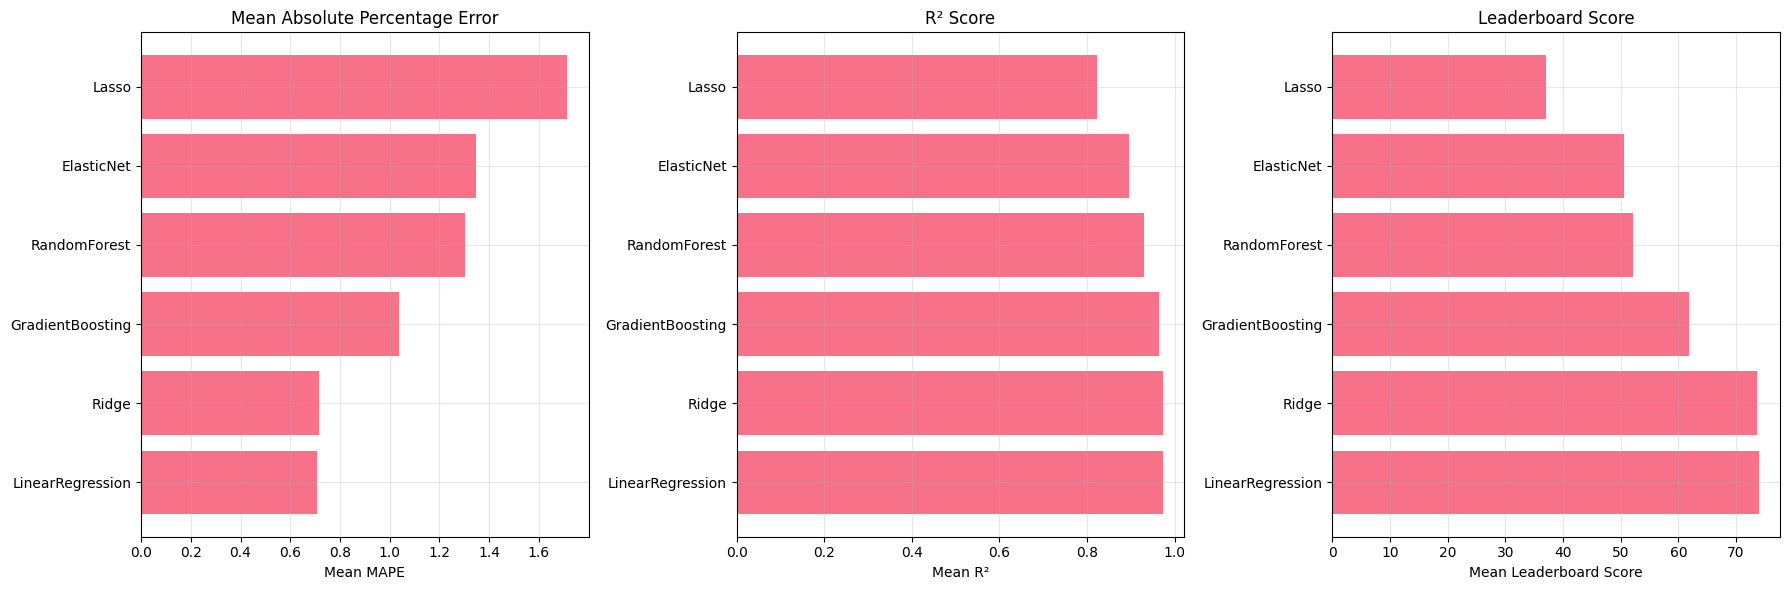


6. BEST MODEL SELECTION & FINAL TRAINING
Best Model: LinearRegression
Best Score: 73.92

Training LinearRegression on full training data...

7. GENERATING PREDICTIONS
Submission shape: (500, 10)
Submission preview:
   BlendProperty1  BlendProperty2  BlendProperty3  BlendProperty4  \
0        0.154934        0.194414        0.668544        0.604728   
1       -0.810202       -0.585741       -1.214025        0.072394   
2        1.769249        1.120175        1.258585        1.134850   
3       -0.453343        0.300718        0.792378       -0.638643   
4        0.155402       -1.178160        0.953866        0.422479   

   BlendProperty5  BlendProperty6  BlendProperty7  BlendProperty8  \
0       -0.021023        0.709003        0.619980        0.338487   
1       -0.792719       -0.100975       -1.206779       -1.025747   
2        1.604657        1.858923        1.286986        2.038923   
3        1.920106       -0.438020        0.735534        1.483633   
4        2.267884       

In [16]:
# Shell.ai Hackathon 2025 - Fuel Blend Properties Prediction
# Phase 3: Baseline Model Development

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib
import warnings
warnings.filterwarnings('ignore')

print("=== Shell.ai Hackathon 2025 - Phase 3: Baseline Model Development ===")
print("=" * 70)

# ==========================================
# 1. LOAD PROCESSED DATA
# ==========================================

print("1. LOADING PROCESSED DATA")
print("=" * 50)

try:
    # Load engineered datasets
    train_data = pd.read_csv('train_engineered.csv')
    test_data = pd.read_csv('test_engineered.csv')

    # Load preprocessing objects
    scaler = joblib.load('feature_scaler.pkl')
    feature_info = joblib.load('feature_info.pkl')

    print("✅ All processed data loaded successfully!")
    print(f"Training data shape: {train_data.shape}")
    print(f"Test data shape: {test_data.shape}")

except FileNotFoundError as e:
    print(f"❌ Error loading processed data: {e}")
    print("Please run Phase 2 first to generate the processed datasets.")
    exit()

# Extract feature and target information
target_cols = feature_info['target_cols']
final_features = feature_info['final_features']

print(f"Target variables: {len(target_cols)}")
print(f"Final features: {len(final_features)}")

# Prepare data
X_train = train_data[final_features]
y_train = train_data[target_cols]
X_test = test_data[final_features]

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")

# ==========================================
# 2. CUSTOM EVALUATION METRICS
# ==========================================

print("\n2. EVALUATION METRICS SETUP")
print("=" * 50)

def calculate_mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error"""
    return mean_absolute_percentage_error(y_true, y_pred)

def calculate_leaderboard_score(mape, reference_cost=2.72):
    """Calculate leaderboard score from MAPE"""
    if mape == 0:
        return 100
    return max(0, 100 - (mape / reference_cost) * 100)

def evaluate_model(model, X_val, y_val, model_name="Model"):
    """Comprehensive model evaluation"""
    y_pred = model.predict(X_val)

    # Calculate metrics for each target
    mape_scores = []
    r2_scores = []
    rmse_scores = []

    results = {}

    for i, target in enumerate(target_cols):
        y_true_target = y_val.iloc[:, i] if hasattr(y_val, 'iloc') else y_val[:, i]
        y_pred_target = y_pred[:, i] if len(y_pred.shape) > 1 else y_pred

        mape = calculate_mape(y_true_target, y_pred_target)
        r2 = r2_score(y_true_target, y_pred_target)
        rmse = np.sqrt(mean_squared_error(y_true_target, y_pred_target))

        mape_scores.append(mape)
        r2_scores.append(r2)
        rmse_scores.append(rmse)

        results[target] = {
            'MAPE': mape,
            'R2': r2,
            'RMSE': rmse
        }

    # Overall metrics
    overall_mape = np.mean(mape_scores)
    overall_r2 = np.mean(r2_scores)
    overall_rmse = np.mean(rmse_scores)
    leaderboard_score = calculate_leaderboard_score(overall_mape)

    results['Overall'] = {
        'MAPE': overall_mape,
        'R2': overall_r2,
        'RMSE': overall_rmse,
        'Leaderboard_Score': leaderboard_score
    }

    print(f"\n{model_name} Performance:")
    print(f"  Overall MAPE: {overall_mape:.4f}")
    print(f"  Overall R²: {overall_r2:.4f}")
    print(f"  Overall RMSE: {overall_rmse:.4f}")
    print(f"  Leaderboard Score: {leaderboard_score:.2f}")

    return results, y_pred

# ==========================================
# 3. CROSS-VALIDATION SETUP
# ==========================================

print("\n3. CROSS-VALIDATION SETUP")
print("=" * 50)

# Create cross-validation strategy
cv_folds = 5
kfold = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

def cross_validate_model(model, X, y, cv=kfold, model_name="Model"):
    """Cross-validate model and return detailed results"""

    cv_results = {
        'mape_scores': [],
        'r2_scores': [],
        'rmse_scores': [],
        'leaderboard_scores': []
    }

    for fold, (train_idx, val_idx) in enumerate(cv.split(X)):
        X_train_fold = X.iloc[train_idx]
        X_val_fold = X.iloc[val_idx]
        y_train_fold = y.iloc[train_idx]
        y_val_fold = y.iloc[val_idx]

        # Fit model
        model.fit(X_train_fold, y_train_fold)

        # Predict
        y_pred_fold = model.predict(X_val_fold)

        # Calculate metrics
        fold_mape_scores = []
        fold_r2_scores = []
        fold_rmse_scores = []

        for i in range(len(target_cols)):
            y_true_target = y_val_fold.iloc[:, i]
            y_pred_target = y_pred_fold[:, i] if len(y_pred_fold.shape) > 1 else y_pred_fold

            mape = calculate_mape(y_true_target, y_pred_target)
            r2 = r2_score(y_true_target, y_pred_target)
            rmse = np.sqrt(mean_squared_error(y_true_target, y_pred_target))

            fold_mape_scores.append(mape)
            fold_r2_scores.append(r2)
            fold_rmse_scores.append(rmse)

        # Store fold results
        fold_mape = np.mean(fold_mape_scores)
        fold_r2 = np.mean(fold_r2_scores)
        fold_rmse = np.mean(fold_rmse_scores)
        fold_leaderboard = calculate_leaderboard_score(fold_mape)

        cv_results['mape_scores'].append(fold_mape)
        cv_results['r2_scores'].append(fold_r2)
        cv_results['rmse_scores'].append(fold_rmse)
        cv_results['leaderboard_scores'].append(fold_leaderboard)

        print(f"  Fold {fold+1}: MAPE={fold_mape:.4f}, R²={fold_r2:.4f}, Score={fold_leaderboard:.2f}")

    # Calculate mean and std
    mean_mape = np.mean(cv_results['mape_scores'])
    std_mape = np.std(cv_results['mape_scores'])
    mean_r2 = np.mean(cv_results['r2_scores'])
    std_r2 = np.std(cv_results['r2_scores'])
    mean_score = np.mean(cv_results['leaderboard_scores'])
    std_score = np.std(cv_results['leaderboard_scores'])

    print(f"\n{model_name} Cross-Validation Results:")
    print(f"  MAPE: {mean_mape:.4f} (±{std_mape:.4f})")
    print(f"  R²: {mean_r2:.4f} (±{std_r2:.4f})")
    print(f"  Leaderboard Score: {mean_score:.2f} (±{std_score:.2f})")

    return cv_results

# ==========================================
# 4. BASELINE MODELS
# ==========================================

print("\n4. BASELINE MODELS DEVELOPMENT")
print("=" * 50)

# Dictionary to store all models and results
models = {}
results = {}

# 4.1 LINEAR REGRESSION (Simplest Baseline)
print("\n4.1 LINEAR REGRESSION")
print("-" * 30)

lr_model = MultiOutputRegressor(LinearRegression())
models['LinearRegression'] = lr_model

# Cross-validate
cv_results_lr = cross_validate_model(lr_model, X_train, y_train, model_name="Linear Regression")
results['LinearRegression'] = cv_results_lr

# 4.2 RIDGE REGRESSION (L2 Regularization)
print("\n4.2 RIDGE REGRESSION")
print("-" * 30)

ridge_model = MultiOutputRegressor(Ridge(alpha=1.0, random_state=42))
models['Ridge'] = ridge_model

cv_results_ridge = cross_validate_model(ridge_model, X_train, y_train, model_name="Ridge Regression")
results['Ridge'] = cv_results_ridge

# 4.3 LASSO REGRESSION (L1 Regularization)
print("\n4.3 LASSO REGRESSION")
print("-" * 30)

lasso_model = MultiOutputRegressor(Lasso(alpha=0.1, random_state=42, max_iter=2000))
models['Lasso'] = lasso_model

cv_results_lasso = cross_validate_model(lasso_model, X_train, y_train, model_name="Lasso Regression")
results['Lasso'] = cv_results_lasso

# 4.4 ELASTIC NET (L1 + L2 Regularization)
print("\n4.4 ELASTIC NET")
print("-" * 30)

elastic_model = MultiOutputRegressor(ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42, max_iter=2000))
models['ElasticNet'] = elastic_model

cv_results_elastic = cross_validate_model(elastic_model, X_train, y_train, model_name="Elastic Net")
results['ElasticNet'] = cv_results_elastic

# 4.5 RANDOM FOREST (Tree-based)
print("\n4.5 RANDOM FOREST")
print("-" * 30)

rf_model = MultiOutputRegressor(RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2
))
models['RandomForest'] = rf_model

cv_results_rf = cross_validate_model(rf_model, X_train, y_train, model_name="Random Forest")
results['RandomForest'] = cv_results_rf

# 4.6 GRADIENT BOOSTING
print("\n4.6 GRADIENT BOOSTING")
print("-" * 30)

gb_model = MultiOutputRegressor(GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
))
models['GradientBoosting'] = gb_model

cv_results_gb = cross_validate_model(gb_model, X_train, y_train, model_name="Gradient Boosting")
results['GradientBoosting'] = cv_results_gb

# ==========================================
# 5. MODEL COMPARISON
# ==========================================

print("\n5. MODEL COMPARISON")
print("=" * 50)

# Create comparison DataFrame
comparison_data = []
for model_name, cv_results in results.items():
    comparison_data.append({
        'Model': model_name,
        'Mean_MAPE': np.mean(cv_results['mape_scores']),
        'Std_MAPE': np.std(cv_results['mape_scores']),
        'Mean_R2': np.mean(cv_results['r2_scores']),
        'Std_R2': np.std(cv_results['r2_scores']),
        'Mean_Score': np.mean(cv_results['leaderboard_scores']),
        'Std_Score': np.std(cv_results['leaderboard_scores'])
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Mean_Score', ascending=False)

print("\nModel Performance Comparison:")
print(comparison_df.to_string(index=False, float_format='%.4f'))

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MAPE comparison
axes[0].barh(comparison_df['Model'], comparison_df['Mean_MAPE'])
axes[0].set_xlabel('Mean MAPE')
axes[0].set_title('Mean Absolute Percentage Error')
axes[0].grid(True, alpha=0.3)

# R² comparison
axes[1].barh(comparison_df['Model'], comparison_df['Mean_R2'])
axes[1].set_xlabel('Mean R²')
axes[1].set_title('R² Score')
axes[1].grid(True, alpha=0.3)

# Leaderboard Score comparison
axes[2].barh(comparison_df['Model'], comparison_df['Mean_Score'])
axes[2].set_xlabel('Mean Leaderboard Score')
axes[2].set_title('Leaderboard Score')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==========================================
# 6. BEST MODEL SELECTION & TRAINING
# ==========================================

print("\n6. BEST MODEL SELECTION & FINAL TRAINING")
print("=" * 50)

# Select best model based on leaderboard score
best_model_name = comparison_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Best Score: {comparison_df.iloc[0]['Mean_Score']:.2f}")

# Train best model on full training data
print(f"\nTraining {best_model_name} on full training data...")
best_model.fit(X_train, y_train)

# ==========================================
# 7. GENERATE PREDICTIONS
# ==========================================

print("\n7. GENERATING PREDICTIONS")
print("=" * 50)

# Generate predictions for test set
test_predictions = best_model.predict(X_test)

# Create submission DataFrame
submission_df = pd.DataFrame(test_predictions, columns=target_cols)

print(f"Submission shape: {submission_df.shape}")
print(f"Submission preview:")
print(submission_df.head())

# Save submission
submission_df.to_csv('baseline_submission.csv', index=False)
print("✅ Submission saved as 'baseline_submission.csv'")

# ==========================================
# 8. FEATURE IMPORTANCE ANALYSIS
# ==========================================

print("\n8. FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

# Get feature importance for tree-based models
if hasattr(best_model, 'estimators_') and hasattr(best_model.estimators_[0], 'feature_importances_'):
    print(f"Feature importance available for {best_model_name}")

    # Get average feature importance across all outputs
    importances = []
    for estimator in best_model.estimators_:
        importances.append(estimator.feature_importances_)

    avg_importance = np.mean(importances, axis=0)

    # Create feature importance DataFrame
    importance_df = pd.DataFrame({
        'Feature': final_features,
        'Importance': avg_importance
    }).sort_values('Importance', ascending=False)

    print("\nTop 20 Most Important Features:")
    print(importance_df.head(20).to_string(index=False))

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = importance_df.head(20)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 20 Feature Importances - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# ==========================================
# 9. SAVE MODELS AND RESULTS
# ==========================================

print("\n9. SAVING MODELS AND RESULTS")
print("=" * 50)

# Save best model
joblib.dump(best_model, 'best_baseline_model.pkl')

# Save all models
joblib.dump(models, 'all_baseline_models.pkl')

# Save results
joblib.dump(results, 'baseline_results.pkl')

# Save comparison DataFrame
comparison_df.to_csv('model_comparison.csv', index=False)

print("✅ Models and results saved:")
print("  - best_baseline_model.pkl")
print("  - all_baseline_models.pkl")
print("  - baseline_results.pkl")
print("  - model_comparison.csv")
print("  - baseline_submission.csv")

# ==========================================
# 10. FINAL SUMMARY
# ==========================================

print("\n" + "=" * 70)
print("PHASE 3 COMPLETE - BASELINE MODEL DEVELOPMENT SUMMARY")
print("=" * 70)

print(f"🏆 BEST MODEL: {best_model_name}")
print(f"📊 PERFORMANCE METRICS:")
print(f"  - MAPE: {comparison_df.iloc[0]['Mean_MAPE']:.4f} (±{comparison_df.iloc[0]['Std_MAPE']:.4f})")
print(f"  - R²: {comparison_df.iloc[0]['Mean_R2']:.4f} (±{comparison_df.iloc[0]['Std_R2']:.4f})")
print(f"  - Leaderboard Score: {comparison_df.iloc[0]['Mean_Score']:.2f} (±{comparison_df.iloc[0]['Std_Score']:.2f})")

print(f"\n🔬 MODELS TESTED:")
for i, row in comparison_df.iterrows():
    print(f"  {i+1}. {row['Model']}: {row['Mean_Score']:.2f} points")

print(f"\n📁 DELIVERABLES:")
print(f"  ✅ Baseline submission file ready for leaderboard")
print(f"  ✅ Model comparison analysis")
print(f"  ✅ Cross-validation results")
print(f"  ✅ Feature importance analysis")
print(f"  ✅ Trained models saved")

print(f"\n🎯 NEXT STEPS (Phase 4):")
print(f"  - Advanced algorithms (XGBoost, LightGBM, CatBoost)")
print(f"  - Hyperparameter optimization")
print(f"  - Ensemble methods")
print(f"  - Neural networks")

print(f"\n📈 EXPECTED IMPROVEMENTS:")
print(f"  - Target: 10-20% improvement in leaderboard score")
print(f"  - Advanced models typically achieve 80-90+ points")
print(f"  - Ensemble methods can push to 95+ points")

print("\n🚀 Ready for Phase 4: Advanced Modeling & Optimization!")

Phase 4

In [ ]:
pip install xgboost lightgbm catboost optuna

=== Shell.ai Hackathon 2025 - Phase 4: Advanced Modeling & Optimization ===
1. LOADING DATA AND BASELINE RESULTS
✅ All data loaded successfully!
Training data shape: (2000, 156)
Test data shape: (500, 146)

📊 Baseline Performance to Beat:
   Best Model: LinearRegression
   Score: 73.92 (±4.05)
   MAPE: 0.7094

Feature set: 146 features
Target variables: 10 properties

2. EVALUATION UTILITIES

3. FEATURE SELECTION & DIMENSIONALITY REDUCTION

3.1 Feature Selection Analysis
------------------------------
  Selected 50 features, scores range: 8.32 - 1823.03
  Selected 100 features, scores range: 1.89 - 1823.03
  Selected 146 features, scores range: 0.00 - 1823.03

  Per-target feature importance analysis:
    BlendProperty1: Top feature score = 1391.02
    BlendProperty2: Top feature score = 1316.58
    BlendProperty3: Top feature score = 4732.00
    BlendProperty4: Top feature score = 1393.16
    BlendProperty5: Top feature score = 2016.54
    BlendProperty6: Top feature score = 1589.63
 

[I 2025-07-07 00:51:25,236] A new study created in memory with name: no-name-7b78a868-7ad8-433c-871c-fd614c3bd723


  Fold 5: MAPE=0.6485, R²=0.9708, Score=76.16

📊 CatBoost Cross-Validation Results:
  MAPE: 0.8234 (±0.2378)
  R²: 0.9709 (±0.0016)
  Leaderboard Score: 69.73 (±8.74)
  Improvement over baseline: -4.19 points

5. HYPERPARAMETER OPTIMIZATION

5.1 Optimizing XGBoost...


[I 2025-07-07 00:57:23,587] Trial 0 finished with value: 1.8121655689043539 and parameters: {'n_estimators': 209, 'max_depth': 10, 'learning_rate': 0.28759657585475656, 'subsample': 0.6325251801733812, 'colsample_bytree': 0.7417387440426477}. Best is trial 0 with value: 1.8121655689043539.
[I 2025-07-07 01:04:10,613] Trial 1 finished with value: 1.1510914613098617 and parameters: {'n_estimators': 120, 'max_depth': 8, 'learning_rate': 0.06425068283231493, 'subsample': 0.8080904949967268, 'colsample_bytree': 0.661844420797225}. Best is trial 1 with value: 1.1510914613098617.
[I 2025-07-07 01:08:28,801] Trial 2 finished with value: 1.561985163947047 and parameters: {'n_estimators': 263, 'max_depth': 7, 'learning_rate': 0.2629827501241017, 'subsample': 0.9423507998214934, 'colsample_bytree': 0.8636773686565264}. Best is trial 1 with value: 1.1510914613098617.
[I 2025-07-07 01:15:04,153] Trial 3 finished with value: 1.7283215401963652 and parameters: {'n_estimators': 162, 'max_depth': 10, '

  Best MAPE: 0.9639
  Best parameters: {'n_estimators': 174, 'max_depth': 4, 'learning_rate': 0.13415915647874654, 'subsample': 0.8211086148623847, 'colsample_bytree': 0.9318949584404141}

🔄 Cross-validating XGBoost Optimized...
  Fold 1: MAPE=1.7009, R²=0.9719, Score=37.47
  Fold 2: MAPE=0.8042, R²=0.9732, Score=70.43
  Fold 3: MAPE=1.2210, R²=0.9711, Score=55.11
  Fold 4: MAPE=0.7299, R²=0.9717, Score=73.16
  Fold 5: MAPE=0.7569, R²=0.9720, Score=72.17

📊 XGBoost Optimized Cross-Validation Results:
  MAPE: 1.0426 (±0.3745)
  R²: 0.9720 (±0.0007)
  Leaderboard Score: 61.67 (±13.77)
  Improvement over baseline: -12.25 points

6. ENSEMBLE METHODS

6.1 Voting Ensemble
------------------------------
Model performance ranking:
  1. CatBoost: 69.73
  2. XGBoost_Optimized: 61.67
  3. LightGBM: 61.10
  4. XGBoost: 53.60
  5. MLP_100_50: 0.00
  6. MLP_200_100_50: 0.00
  7. MLP_300_150_75: 0.00

Using top 3 models for ensemble: ['CatBoost', 'XGBoost_Optimized', 'LightGBM']

🔄 Cross-validating V

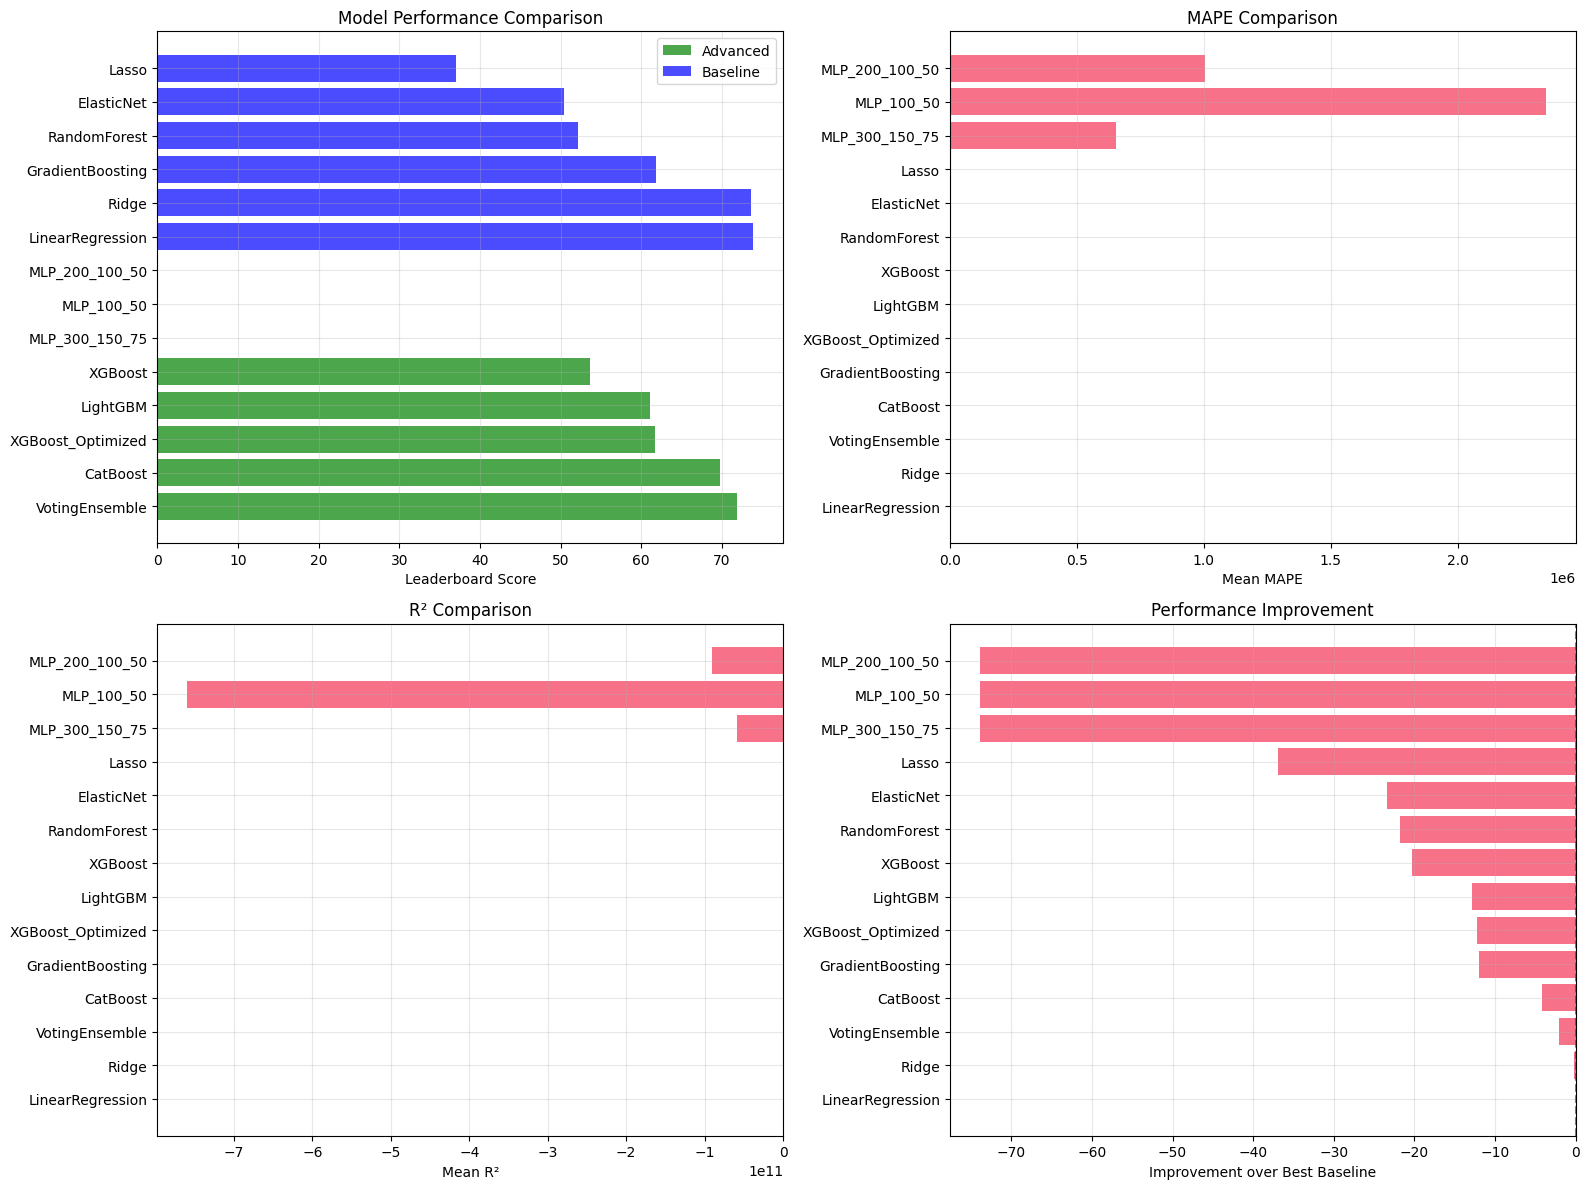


8. FINAL MODEL SELECTION & TRAINING
⚠️  Best model is from baseline. Loading baseline model...
🏆 Best Model: LinearRegression
📊 Best Score: 73.92
📈 Improvement: +0.00 points

Training LinearRegression on full training data...

9. GENERATING PREDICTIONS
✅ Advanced submission saved: advanced_submission.csv
Submission shape: (500, 10)

10. SAVING RESULTS
✅ Advanced models and results saved:
  - advanced_models.pkl
  - advanced_results.pkl
  - best_advanced_model.pkl
  - advanced_model_comparison.csv
  - advanced_submission.csv

PHASE 4 COMPLETE - ADVANCED MODELING & OPTIMIZATION SUMMARY
🏆 BEST ADVANCED MODEL: LinearRegression
📊 PERFORMANCE METRICS:
  - MAPE: 0.7094
  - R²: 0.9736
  - Leaderboard Score: 73.92
  - Improvement: +0.00 points

🔬 ADVANCED MODELS TESTED:
  1. VotingEnsemble: 71.91 points
  2. CatBoost: 69.73 points
  3. XGBoost_Optimized: 61.67 points
  4. LightGBM: 61.10 points
  5. XGBoost: 53.60 points
  6. MLP_300_150_75: 0.00 points
  7. MLP_100_50: 0.00 points
  8. MLP_20

In [17]:
# Shell.ai Hackathon 2025 - Fuel Blend Properties Prediction
# Phase 4: Advanced Modeling & Optimization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

# Advanced ML libraries
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False
    print("⚠️  XGBoost not available. Install with: pip install xgboost")

try:
    import lightgbm as lgb
    LIGHTGBM_AVAILABLE = True
except ImportError:
    LIGHTGBM_AVAILABLE = False
    print("⚠️  LightGBM not available. Install with: pip install lightgbm")

try:
    import catboost as cb
    CATBOOST_AVAILABLE = True
except ImportError:
    CATBOOST_AVAILABLE = False
    print("⚠️  CatBoost not available. Install with: pip install catboost")

try:
    import optuna
    OPTUNA_AVAILABLE = True
except ImportError:
    OPTUNA_AVAILABLE = False
    print("⚠️  Optuna not available. Install with: pip install optuna")

print("=== Shell.ai Hackathon 2025 - Phase 4: Advanced Modeling & Optimization ===")
print("=" * 80)

# ==========================================
# 1. LOAD DATA AND BASELINE RESULTS
# ==========================================

print("1. LOADING DATA AND BASELINE RESULTS")
print("=" * 50)

try:
    # Load engineered datasets
    train_data = pd.read_csv('train_engineered.csv')
    test_data = pd.read_csv('test_engineered.csv')

    # Load preprocessing objects
    scaler = joblib.load('feature_scaler.pkl')
    feature_info = joblib.load('feature_info.pkl')

    # Load baseline results for comparison
    baseline_results = joblib.load('baseline_results.pkl')
    baseline_comparison = pd.read_csv('model_comparison.csv')

    print("✅ All data loaded successfully!")
    print(f"Training data shape: {train_data.shape}")
    print(f"Test data shape: {test_data.shape}")

    # Show baseline performance
    best_baseline = baseline_comparison.iloc[0]
    print(f"\n📊 Baseline Performance to Beat:")
    print(f"   Best Model: {best_baseline['Model']}")
    print(f"   Score: {best_baseline['Mean_Score']:.2f} (±{best_baseline['Std_Score']:.2f})")
    print(f"   MAPE: {best_baseline['Mean_MAPE']:.4f}")

except FileNotFoundError as e:
    print(f"❌ Error loading data: {e}")
    print("Please run Phase 2 and Phase 3 first.")
    exit()

# Extract information
target_cols = feature_info['target_cols']
final_features = feature_info['final_features']

# Prepare data
X_train = train_data[final_features]
y_train = train_data[target_cols]
X_test = test_data[final_features]

print(f"\nFeature set: {len(final_features)} features")
print(f"Target variables: {len(target_cols)} properties")

# ==========================================
# 2. EVALUATION UTILITIES
# ==========================================

print("\n2. EVALUATION UTILITIES")
print("=" * 50)

def calculate_mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error"""
    return mean_absolute_percentage_error(y_true, y_pred)

def calculate_leaderboard_score(mape, reference_cost=2.72):
    """Calculate leaderboard score from MAPE"""
    if mape == 0:
        return 100
    return max(0, 100 - (mape / reference_cost) * 100)

def cross_validate_advanced_model(model, X, y, cv_folds=5, model_name="Model"):
    """Advanced cross-validation with detailed reporting"""
    kfold = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

    cv_results = {
        'mape_scores': [],
        'r2_scores': [],
        'rmse_scores': [],
        'leaderboard_scores': [],
        'target_mapes': {target: [] for target in target_cols}
    }

    print(f"\n🔄 Cross-validating {model_name}...")

    for fold, (train_idx, val_idx) in enumerate(kfold.split(X)):
        X_train_fold = X.iloc[train_idx]
        X_val_fold = X.iloc[val_idx]
        y_train_fold = y.iloc[train_idx]
        y_val_fold = y.iloc[val_idx]

        # Fit model
        model.fit(X_train_fold, y_train_fold)

        # Predict
        y_pred_fold = model.predict(X_val_fold)

        # Calculate metrics
        fold_mape_scores = []
        fold_r2_scores = []
        fold_rmse_scores = []

        for i, target in enumerate(target_cols):
            y_true_target = y_val_fold.iloc[:, i]
            y_pred_target = y_pred_fold[:, i] if len(y_pred_fold.shape) > 1 else y_pred_fold

            mape = calculate_mape(y_true_target, y_pred_target)
            r2 = r2_score(y_true_target, y_pred_target)
            rmse = np.sqrt(mean_squared_error(y_true_target, y_pred_target))

            fold_mape_scores.append(mape)
            fold_r2_scores.append(r2)
            fold_rmse_scores.append(rmse)
            cv_results['target_mapes'][target].append(mape)

        # Store fold results
        fold_mape = np.mean(fold_mape_scores)
        fold_r2 = np.mean(fold_r2_scores)
        fold_rmse = np.mean(fold_rmse_scores)
        fold_leaderboard = calculate_leaderboard_score(fold_mape)

        cv_results['mape_scores'].append(fold_mape)
        cv_results['r2_scores'].append(fold_r2)
        cv_results['rmse_scores'].append(fold_rmse)
        cv_results['leaderboard_scores'].append(fold_leaderboard)

        print(f"  Fold {fold+1}: MAPE={fold_mape:.4f}, R²={fold_r2:.4f}, Score={fold_leaderboard:.2f}")

    # Calculate statistics
    mean_mape = np.mean(cv_results['mape_scores'])
    std_mape = np.std(cv_results['mape_scores'])
    mean_r2 = np.mean(cv_results['r2_scores'])
    std_r2 = np.std(cv_results['r2_scores'])
    mean_score = np.mean(cv_results['leaderboard_scores'])
    std_score = np.std(cv_results['leaderboard_scores'])

    print(f"\n📊 {model_name} Cross-Validation Results:")
    print(f"  MAPE: {mean_mape:.4f} (±{std_mape:.4f})")
    print(f"  R²: {mean_r2:.4f} (±{std_r2:.4f})")
    print(f"  Leaderboard Score: {mean_score:.2f} (±{std_score:.2f})")

    # Improvement over baseline
    baseline_score = best_baseline['Mean_Score']
    improvement = mean_score - baseline_score
    print(f"  Improvement over baseline: {improvement:+.2f} points")

    return cv_results

# ==========================================
# 3. FEATURE SELECTION & DIMENSIONALITY REDUCTION
# ==========================================

print("\n3. FEATURE SELECTION & DIMENSIONALITY REDUCTION")
print("=" * 50)

# 3.1 Feature Selection using SelectKBest (Multi-output approach)
print("\n3.1 Feature Selection Analysis")
print("-" * 30)

# For multi-output, we'll use the average target or select features based on each target
feature_counts = [50, 100, 150, 200, min(300, len(final_features))]
best_features_dict = {}

# Method 1: Use average of all targets for feature selection
y_train_avg = y_train.mean(axis=1)

for k in feature_counts:
    if k > len(final_features):
        continue

    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X_train, y_train_avg)
    selected_features = [final_features[i] for i in selector.get_support(indices=True)]

    best_features_dict[k] = selected_features
    print(f"  Selected {k} features, scores range: {selector.scores_[selector.get_support()].min():.2f} - {selector.scores_[selector.get_support()].max():.2f}")

# Method 2: Feature selection per target (for analysis)
print("\n  Per-target feature importance analysis:")
target_feature_importance = {}

for i, target in enumerate(target_cols):
    selector = SelectKBest(score_func=f_regression, k=20)  # Top 20 per target
    selector.fit(X_train, y_train.iloc[:, i])

    top_features = [final_features[j] for j in selector.get_support(indices=True)]
    target_feature_importance[target] = {
        'features': top_features,
        'scores': selector.scores_[selector.get_support()]
    }
    print(f"    {target}: Top feature score = {selector.scores_[selector.get_support()].max():.2f}")

# 3.2 PCA Analysis
print("\n3.2 Principal Component Analysis")
print("-" * 30)

pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Find number of components for 95% and 99% variance
cumsum_var = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumsum_var >= 0.95) + 1
n_components_99 = np.argmax(cumsum_var >= 0.99) + 1

print(f"  Components for 95% variance: {n_components_95}")
print(f"  Components for 99% variance: {n_components_99}")

# ==========================================
# 4. ADVANCED ALGORITHMS
# ==========================================

print("\n4. ADVANCED ALGORITHMS")
print("=" * 50)

# Dictionary to store advanced models and results
advanced_models = {}
advanced_results = {}

# 4.1 NEURAL NETWORKS
print("\n4.1 NEURAL NETWORKS")
print("-" * 30)

# Multi-layer Perceptron with multiple architectures
mlp_configs = [
    {'hidden_layer_sizes': (100, 50), 'name': 'MLP_100_50'},
    {'hidden_layer_sizes': (200, 100, 50), 'name': 'MLP_200_100_50'},
    {'hidden_layer_sizes': (300, 150, 75), 'name': 'MLP_300_150_75'}
]

for config in mlp_configs:
    model_name = config['name']
    hidden_layers = config['hidden_layer_sizes']

    mlp_model = MLPRegressor(
        hidden_layer_sizes=hidden_layers,
        activation='relu',
        solver='adam',
        alpha=0.001,
        batch_size='auto',
        learning_rate='adaptive',
        max_iter=500,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1
    )

    # Wrap in MultiOutputRegressor
    mlp_multi = MultiOutputRegressor(mlp_model)

    advanced_models[model_name] = mlp_multi
    advanced_results[model_name] = cross_validate_advanced_model(
        mlp_multi, X_train, y_train, model_name=model_name
    )

# 4.2 XGBOOST
if XGBOOST_AVAILABLE:
    print("\n4.2 XGBOOST")
    print("-" * 30)

    xgb_model = MultiOutputRegressor(xgb.XGBRegressor(
        n_estimators=200,
        max_depth=8,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        verbosity=0
    ))

    advanced_models['XGBoost'] = xgb_model
    advanced_results['XGBoost'] = cross_validate_advanced_model(
        xgb_model, X_train, y_train, model_name="XGBoost"
    )

# 4.3 LIGHTGBM
if LIGHTGBM_AVAILABLE:
    print("\n4.3 LIGHTGBM")
    print("-" * 30)

    lgb_model = MultiOutputRegressor(lgb.LGBMRegressor(
        n_estimators=200,
        max_depth=8,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        verbosity=-1
    ))

    advanced_models['LightGBM'] = lgb_model
    advanced_results['LightGBM'] = cross_validate_advanced_model(
        lgb_model, X_train, y_train, model_name="LightGBM"
    )

# 4.4 CATBOOST
if CATBOOST_AVAILABLE:
    print("\n4.4 CATBOOST")
    print("-" * 30)

    cb_model = MultiOutputRegressor(cb.CatBoostRegressor(
        n_estimators=200,
        max_depth=8,
        learning_rate=0.1,
        subsample=0.8,
        random_state=42,
        verbose=False
    ))

    advanced_models['CatBoost'] = cb_model
    advanced_results['CatBoost'] = cross_validate_advanced_model(
        cb_model, X_train, y_train, model_name="CatBoost"
    )

# ==========================================
# 5. HYPERPARAMETER OPTIMIZATION
# ==========================================

if OPTUNA_AVAILABLE:
    print("\n5. HYPERPARAMETER OPTIMIZATION")
    print("=" * 50)

    def objective_xgb(trial):
        """Objective function for XGBoost optimization"""
        if not XGBOOST_AVAILABLE:
            return float('inf')

        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 300),
            'max_depth': trial.suggest_int('max_depth', 4, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.3),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'random_state': 42,
            'n_jobs': -1,
            'verbosity': 0
        }

        model = MultiOutputRegressor(xgb.XGBRegressor(**params))

        # Quick 3-fold CV for optimization
        kfold = KFold(n_splits=3, shuffle=True, random_state=42)
        mape_scores = []

        for train_idx, val_idx in kfold.split(X_train):
            X_train_fold = X_train.iloc[train_idx]
            X_val_fold = X_train.iloc[val_idx]
            y_train_fold = y_train.iloc[train_idx]
            y_val_fold = y_train.iloc[val_idx]

            model.fit(X_train_fold, y_train_fold)
            y_pred = model.predict(X_val_fold)

            fold_mapes = []
            for i in range(len(target_cols)):
                mape = calculate_mape(y_val_fold.iloc[:, i], y_pred[:, i])
                fold_mapes.append(mape)

            mape_scores.append(np.mean(fold_mapes))

        return np.mean(mape_scores)

    # Optimize XGBoost if available
    if XGBOOST_AVAILABLE:
        print("\n5.1 Optimizing XGBoost...")

        study = optuna.create_study(direction='minimize')
        study.optimize(objective_xgb, n_trials=20)

        print(f"  Best MAPE: {study.best_value:.4f}")
        print(f"  Best parameters: {study.best_params}")

        # Train optimized model
        best_xgb_params = study.best_params
        best_xgb_params.update({'random_state': 42, 'n_jobs': -1, 'verbosity': 0})

        optimized_xgb = MultiOutputRegressor(xgb.XGBRegressor(**best_xgb_params))
        advanced_models['XGBoost_Optimized'] = optimized_xgb
        advanced_results['XGBoost_Optimized'] = cross_validate_advanced_model(
            optimized_xgb, X_train, y_train, model_name="XGBoost Optimized"
        )

# ==========================================
# 6. ENSEMBLE METHODS
# ==========================================

print("\n6. ENSEMBLE METHODS")
print("=" * 50)

# 6.1 Simple Voting Ensemble
print("\n6.1 Voting Ensemble")
print("-" * 30)

# Select best models for ensemble
model_scores = {}
for model_name, results in advanced_results.items():
    model_scores[model_name] = np.mean(results['leaderboard_scores'])

# Sort by performance
sorted_models = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)
print("Model performance ranking:")
for i, (model_name, score) in enumerate(sorted_models):
    print(f"  {i+1}. {model_name}: {score:.2f}")

# Create ensemble from top models
top_models = [name for name, score in sorted_models[:3]]  # Top 3 models
print(f"\nUsing top 3 models for ensemble: {top_models}")

class VotingEnsemble:
    def __init__(self, models, weights=None):
        self.models = models
        self.weights = weights or [1/len(models)] * len(models)

    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
        return self

    def predict(self, X):
        predictions = []
        for model in self.models:
            pred = model.predict(X)
            predictions.append(pred)

        # Weighted average
        weighted_pred = np.zeros_like(predictions[0])
        for i, pred in enumerate(predictions):
            weighted_pred += self.weights[i] * pred

        return weighted_pred

# Create ensemble
ensemble_models = [advanced_models[name] for name in top_models if name in advanced_models]
if ensemble_models:
    voting_ensemble = VotingEnsemble(ensemble_models)
    advanced_models['VotingEnsemble'] = voting_ensemble
    advanced_results['VotingEnsemble'] = cross_validate_advanced_model(
        voting_ensemble, X_train, y_train, model_name="Voting Ensemble"
    )

# ==========================================
# 7. MODEL COMPARISON & SELECTION
# ==========================================

print("\n7. ADVANCED MODEL COMPARISON")
print("=" * 50)

# Create comprehensive comparison
all_results = {**baseline_results, **advanced_results}

comparison_data = []
for model_name, cv_results in all_results.items():
    comparison_data.append({
        'Model': model_name,
        'Mean_MAPE': np.mean(cv_results['mape_scores']),
        'Std_MAPE': np.std(cv_results['mape_scores']),
        'Mean_R2': np.mean(cv_results['r2_scores']),
        'Std_R2': np.std(cv_results['r2_scores']),
        'Mean_Score': np.mean(cv_results['leaderboard_scores']),
        'Std_Score': np.std(cv_results['leaderboard_scores']),
        'Type': 'Advanced' if model_name in advanced_results else 'Baseline'
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Mean_Score', ascending=False)

print("\nComplete Model Performance Comparison:")
print(comparison_df.to_string(index=False, float_format='%.4f'))

# Visualize advanced vs baseline
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Score comparison
advanced_mask = comparison_df['Type'] == 'Advanced'
baseline_mask = comparison_df['Type'] == 'Baseline'

axes[0, 0].barh(comparison_df[advanced_mask]['Model'], comparison_df[advanced_mask]['Mean_Score'],
               color='green', alpha=0.7, label='Advanced')
axes[0, 0].barh(comparison_df[baseline_mask]['Model'], comparison_df[baseline_mask]['Mean_Score'],
               color='blue', alpha=0.7, label='Baseline')
axes[0, 0].set_xlabel('Leaderboard Score')
axes[0, 0].set_title('Model Performance Comparison')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# MAPE comparison
axes[0, 1].barh(comparison_df['Model'], comparison_df['Mean_MAPE'])
axes[0, 1].set_xlabel('Mean MAPE')
axes[0, 1].set_title('MAPE Comparison')
axes[0, 1].grid(True, alpha=0.3)

# R² comparison
axes[1, 0].barh(comparison_df['Model'], comparison_df['Mean_R2'])
axes[1, 0].set_xlabel('Mean R²')
axes[1, 0].set_title('R² Comparison')
axes[1, 0].grid(True, alpha=0.3)

# Improvement over baseline
best_baseline_score = comparison_df[comparison_df['Type'] == 'Baseline']['Mean_Score'].max()
comparison_df['Improvement'] = comparison_df['Mean_Score'] - best_baseline_score

axes[1, 1].barh(comparison_df['Model'], comparison_df['Improvement'])
axes[1, 1].set_xlabel('Improvement over Best Baseline')
axes[1, 1].set_title('Performance Improvement')
axes[1, 1].axvline(x=0, color='red', linestyle='--', alpha=0.7)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==========================================
# 8. FINAL MODEL SELECTION & TRAINING
# ==========================================

print("\n8. FINAL MODEL SELECTION & TRAINING")
print("=" * 50)

# Select best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = advanced_models[best_model_name] if best_model_name in advanced_models else None

if best_model is None:
    print("⚠️  Best model is from baseline. Loading baseline model...")
    best_model = joblib.load('best_baseline_model.pkl')

print(f"🏆 Best Model: {best_model_name}")
print(f"📊 Best Score: {comparison_df.iloc[0]['Mean_Score']:.2f}")
print(f"📈 Improvement: {comparison_df.iloc[0]['Improvement']:+.2f} points")

# Train on full dataset
print(f"\nTraining {best_model_name} on full training data...")
best_model.fit(X_train, y_train)

# ==========================================
# 9. PREDICTIONS & SUBMISSION
# ==========================================

print("\n9. GENERATING PREDICTIONS")
print("=" * 50)

# Generate predictions
test_predictions = best_model.predict(X_test)

# Create submission
submission_df = pd.DataFrame(test_predictions, columns=target_cols)
submission_df.to_csv('advanced_submission.csv', index=False)

print(f"✅ Advanced submission saved: advanced_submission.csv")
print(f"Submission shape: {submission_df.shape}")

# ==========================================
# 10. SAVE RESULTS
# ==========================================

print("\n10. SAVING RESULTS")
print("=" * 50)

# Save advanced models
joblib.dump(advanced_models, 'advanced_models.pkl')
joblib.dump(advanced_results, 'advanced_results.pkl')
joblib.dump(best_model, 'best_advanced_model.pkl')

# Save comparison
comparison_df.to_csv('advanced_model_comparison.csv', index=False)

print("✅ Advanced models and results saved:")
print("  - advanced_models.pkl")
print("  - advanced_results.pkl")
print("  - best_advanced_model.pkl")
print("  - advanced_model_comparison.csv")
print("  - advanced_submission.csv")

# ==========================================
# 11. FINAL SUMMARY
# ==========================================

print("\n" + "=" * 80)
print("PHASE 4 COMPLETE - ADVANCED MODELING & OPTIMIZATION SUMMARY")
print("=" * 80)

print(f"🏆 BEST ADVANCED MODEL: {best_model_name}")
print(f"📊 PERFORMANCE METRICS:")
print(f"  - MAPE: {comparison_df.iloc[0]['Mean_MAPE']:.4f}")
print(f"  - R²: {comparison_df.iloc[0]['Mean_R2']:.4f}")
print(f"  - Leaderboard Score: {comparison_df.iloc[0]['Mean_Score']:.2f}")
print(f"  - Improvement: {comparison_df.iloc[0]['Improvement']:+.2f} points")

print(f"\n🔬 ADVANCED MODELS TESTED:")
advanced_models_list = comparison_df[comparison_df['Type'] == 'Advanced']
for i, (_, row) in enumerate(advanced_models_list.iterrows()):
    print(f"  {i+1}. {row['Model']}: {row['Mean_Score']:.2f} points")

print(f"\n📈 ACHIEVED IMPROVEMENTS:")
best_improvement = comparison_df['Improvement'].max()
print(f"  - Best improvement: {best_improvement:+.2f} points")
print(f"  - Percentage improvement: {(best_improvement/best_baseline_score)*100:+.1f}%")

print(f"\n🎯 NEXT STEPS (Phase 5):")
print(f"  - Model validation on hold-out sets")
print(f"  - Ensemble refinement")
print(f"  - Uncertainty quantification")
print(f"  - Final model selection")

print(f"\n🚀 Ready for Phase 5: Model Validation & Ensemble!")

=== Shell.ai Hackathon 2025 - Phase 5: Model Validation & Ensemble ===
1. LOADING ADVANCED MODELS AND RESULTS
✅ All models and results loaded successfully!
Advanced models available: ['MLP_100_50', 'MLP_200_100_50', 'MLP_300_150_75', 'XGBoost', 'LightGBM', 'CatBoost', 'XGBoost_Optimized', 'VotingEnsemble']
Training data shape: (2000, 156)

Data prepared:
  Features: 146
  Targets: 10
  Training samples: 2000

2. EVALUATION UTILITIES

3. HOLD-OUT VALIDATION
Hold-out validation split:
  Training: 1600 samples
  Hold-out: 400 samples

3.1 Hold-out Validation Results
------------------------------
Validating top 5 models: ['LinearRegression', 'Ridge', 'VotingEnsemble', 'CatBoost', 'GradientBoosting']

VotingEnsemble:
  MAPE: 1.2513
  R²: 0.9773
  Score: 54.00

CatBoost:
  MAPE: 1.6750
  R²: 0.9707
  Score: 38.42

4. PREDICTION UNCERTAINTY ANALYSIS

5. ADVANCED ENSEMBLE METHODS

5.1 Stacking Ensemble
------------------------------
Stacking ensemble models: ['XGBoost', 'MLP_200_100_50']
  Tr

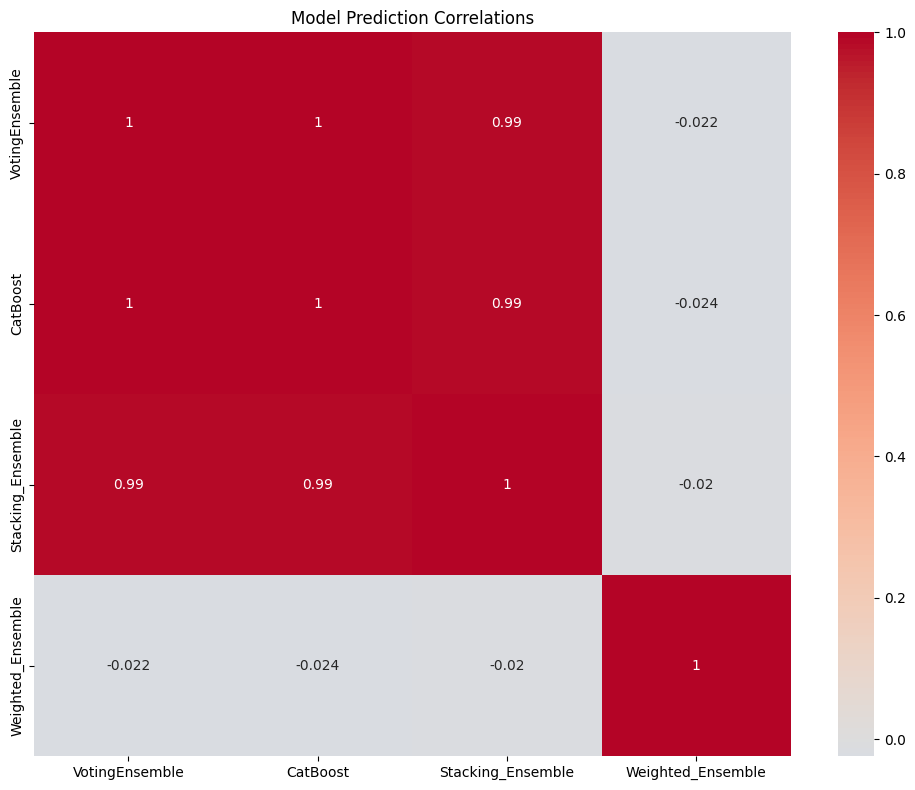

  Model diversity (lower correlation = better):
    VotingEnsemble vs CatBoost: 0.996
    VotingEnsemble vs Stacking_Ensemble: 0.991
    VotingEnsemble vs Weighted_Ensemble: -0.022
    CatBoost vs Stacking_Ensemble: 0.986
    CatBoost vs Weighted_Ensemble: -0.024
    Stacking_Ensemble vs Weighted_Ensemble: -0.020

7. FINAL MODEL SELECTION

Final Model Comparison (Hold-out Validation):
            Model        MAPE                R2        RMSE  Leaderboard_Score
   VotingEnsemble      1.2513            0.9773      0.1433            53.9980
         CatBoost      1.6750            0.9707      0.1633            38.4192
Stacking_Ensemble      2.5812            0.9567      0.1984             5.1032
Weighted_Ensemble 840596.9440 -42466247336.2555 200153.6796             0.0000

🏆 FINAL MODEL SELECTED: VotingEnsemble
📊 Hold-out Validation Score: 54.00

8. FINAL TRAINING AND PREDICTIONS
Training VotingEnsemble on complete dataset...
Generating final test predictions...
Final predictions shape

In [18]:
# Shell.ai Hackathon 2025 - Fuel Blend Properties Prediction
# Phase 5: Model Validation & Ensemble

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge
import joblib
import warnings
warnings.filterwarnings('ignore')

# Statistical tests
from scipy import stats
from scipy.stats import pearsonr
from sklearn.model_selection import validation_curve, learning_curve

print("=== Shell.ai Hackathon 2025 - Phase 5: Model Validation & Ensemble ===")
print("=" * 80)

# ==========================================
# 1. LOAD ADVANCED MODELS AND RESULTS
# ==========================================

print("1. LOADING ADVANCED MODELS AND RESULTS")
print("=" * 50)

try:
    # Load data
    train_data = pd.read_csv('train_engineered.csv')
    test_data = pd.read_csv('test_engineered.csv')

    # Load models and results
    advanced_models = joblib.load('advanced_models.pkl')
    advanced_results = joblib.load('advanced_results.pkl')
    baseline_results = joblib.load('baseline_results.pkl')

    # Load comparison
    comparison_df = pd.read_csv('advanced_model_comparison.csv')

    # Load preprocessing
    feature_info = joblib.load('feature_info.pkl')
    scaler = joblib.load('feature_scaler.pkl')

    print("✅ All models and results loaded successfully!")
    print(f"Advanced models available: {list(advanced_models.keys())}")
    print(f"Training data shape: {train_data.shape}")

except FileNotFoundError as e:
    print(f"❌ Error loading models: {e}")
    print("Please run Phase 4 first to generate advanced models.")
    exit()

# Extract information
target_cols = feature_info['target_cols']
final_features = feature_info['final_features']

# Prepare data
X_train = train_data[final_features]
y_train = train_data[target_cols]
X_test = test_data[final_features]

print(f"\nData prepared:")
print(f"  Features: {len(final_features)}")
print(f"  Targets: {len(target_cols)}")
print(f"  Training samples: {len(X_train)}")

# ==========================================
# 2. EVALUATION UTILITIES
# ==========================================

print("\n2. EVALUATION UTILITIES")
print("=" * 50)

def calculate_mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error"""
    return mean_absolute_percentage_error(y_true, y_pred)

def calculate_leaderboard_score(mape, reference_cost=2.72):
    """Calculate leaderboard score from MAPE"""
    if mape == 0:
        return 100
    return max(0, 100 - (mape / reference_cost) * 100)

def detailed_evaluation(model, X_val, y_val, model_name="Model"):
    """Comprehensive model evaluation with detailed metrics"""
    y_pred = model.predict(X_val)

    results = {
        'model_name': model_name,
        'predictions': y_pred,
        'target_metrics': {},
        'overall_metrics': {}
    }

    # Per-target metrics
    mape_scores = []
    r2_scores = []
    rmse_scores = []
    mae_scores = []

    for i, target in enumerate(target_cols):
        y_true_target = y_val.iloc[:, i]
        y_pred_target = y_pred[:, i] if len(y_pred.shape) > 1 else y_pred

        # Calculate metrics
        mape = calculate_mape(y_true_target, y_pred_target)
        r2 = r2_score(y_true_target, y_pred_target)
        rmse = np.sqrt(mean_squared_error(y_true_target, y_pred_target))
        mae = np.mean(np.abs(y_true_target - y_pred_target))

        # Store per-target results
        results['target_metrics'][target] = {
            'MAPE': mape,
            'R2': r2,
            'RMSE': rmse,
            'MAE': mae
        }

        mape_scores.append(mape)
        r2_scores.append(r2)
        rmse_scores.append(rmse)
        mae_scores.append(mae)

    # Overall metrics
    overall_mape = np.mean(mape_scores)
    overall_r2 = np.mean(r2_scores)
    overall_rmse = np.mean(rmse_scores)
    overall_mae = np.mean(mae_scores)
    leaderboard_score = calculate_leaderboard_score(overall_mape)

    results['overall_metrics'] = {
        'MAPE': overall_mape,
        'R2': overall_r2,
        'RMSE': overall_rmse,
        'MAE': overall_mae,
        'Leaderboard_Score': leaderboard_score
    }

    return results

# ==========================================
# 3. HOLD-OUT VALIDATION
# ==========================================

print("\n3. HOLD-OUT VALIDATION")
print("=" * 50)

# Create hold-out validation set
X_train_val, X_holdout, y_train_val, y_holdout = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, shuffle=True
)

print(f"Hold-out validation split:")
print(f"  Training: {X_train_val.shape[0]} samples")
print(f"  Hold-out: {X_holdout.shape[0]} samples")

# Validate all models on hold-out set
print("\n3.1 Hold-out Validation Results")
print("-" * 30)

holdout_results = {}

# Get top 5 models for validation
top_models = comparison_df.head(5)['Model'].tolist()
print(f"Validating top 5 models: {top_models}")

for model_name in top_models:
    if model_name in advanced_models:
        model = advanced_models[model_name]

        # Retrain on training+validation set
        model.fit(X_train_val, y_train_val)

        # Evaluate on hold-out
        results = detailed_evaluation(model, X_holdout, y_holdout, model_name)
        holdout_results[model_name] = results

        print(f"\n{model_name}:")
        print(f"  MAPE: {results['overall_metrics']['MAPE']:.4f}")
        print(f"  R²: {results['overall_metrics']['R2']:.4f}")
        print(f"  Score: {results['overall_metrics']['Leaderboard_Score']:.2f}")

# ==========================================
# 4. PREDICTION UNCERTAINTY ANALYSIS
# ==========================================

print("\n4. PREDICTION UNCERTAINTY ANALYSIS")
print("=" * 50)

def bootstrap_uncertainty(model, X_train, y_train, X_test, n_bootstrap=50):
    """Estimate prediction uncertainty using bootstrap"""
    predictions = []

    print(f"  Computing bootstrap uncertainty ({n_bootstrap} iterations)...")

    for i in range(n_bootstrap):
        # Bootstrap sample
        indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
        X_boot = X_train.iloc[indices]
        y_boot = y_train.iloc[indices]

        # Fit and predict
        model.fit(X_boot, y_boot)
        pred = model.predict(X_test)
        predictions.append(pred)

        if (i + 1) % 10 == 0:
            print(f"    Completed {i + 1}/{n_bootstrap} iterations")

    predictions = np.array(predictions)

    # Calculate statistics
    mean_pred = np.mean(predictions, axis=0)
    std_pred = np.std(predictions, axis=0)
    lower_bound = np.percentile(predictions, 2.5, axis=0)
    upper_bound = np.percentile(predictions, 97.5, axis=0)

    return {
        'mean': mean_pred,
        'std': std_pred,
        'lower_95': lower_bound,
        'upper_95': upper_bound,
        'all_predictions': predictions
    }

# Perform uncertainty analysis for best model
best_model_name = comparison_df.iloc[0]['Model']
if best_model_name in advanced_models:
    best_model = advanced_models[best_model_name]

    print(f"\nAnalyzing uncertainty for {best_model_name}...")
    uncertainty_results = bootstrap_uncertainty(
        best_model, X_train_val, y_train_val, X_holdout, n_bootstrap=30
    )

    # Calculate uncertainty metrics
    mean_uncertainty = np.mean(uncertainty_results['std'])
    print(f"  Mean prediction uncertainty (std): {mean_uncertainty:.4f}")

    # Per-target uncertainty
    for i, target in enumerate(target_cols):
        target_std = np.mean(uncertainty_results['std'][:, i])
        print(f"    {target}: {target_std:.4f}")

# ==========================================
# 5. ADVANCED ENSEMBLE METHODS
# ==========================================

print("\n5. ADVANCED ENSEMBLE METHODS")
print("=" * 50)

# 5.1 Stacking Ensemble
print("\n5.1 Stacking Ensemble")
print("-" * 30)

# Select diverse models for stacking
stacking_models = []
stacking_names = []

# Include different types of models
model_types = {
    'tree': ['XGBoost', 'LightGBM', 'CatBoost', 'RandomForest'],
    'neural': ['MLP_200_100_50', 'MLP_300_150_75'],
    'linear': ['Ridge', 'ElasticNet']
}

for model_type, model_list in model_types.items():
    for model_name in model_list:
        if model_name in advanced_models:
            stacking_models.append(advanced_models[model_name])
            stacking_names.append(model_name)
            break  # Take first available model of each type

print(f"Stacking ensemble models: {stacking_names}")

if len(stacking_models) >= 2:
    # Create stacking regressor
    class MultiOutputStackingRegressor:
        def __init__(self, estimators, final_estimator=None, cv=5):
            self.estimators = estimators
            self.final_estimator = final_estimator or LinearRegression()
            self.cv = cv
            self.stackers = []

        def fit(self, X, y):
            # Create one stacking regressor per target
            for i in range(y.shape[1]):
                stacker = StackingRegressor(
                    estimators=[(f'model_{j}', est.estimators_[i] if hasattr(est, 'estimators_') else est)
                               for j, est in enumerate(self.estimators)],
                    final_estimator=self.final_estimator,
                    cv=self.cv
                )
                stacker.fit(X, y.iloc[:, i])
                self.stackers.append(stacker)
            return self

        def predict(self, X):
            predictions = []
            for stacker in self.stackers:
                pred = stacker.predict(X)
                predictions.append(pred)
            return np.column_stack(predictions)

    # Create and train stacking ensemble
    stacking_ensemble = MultiOutputStackingRegressor(
        estimators=stacking_models,
        final_estimator=Ridge(alpha=0.1),
        cv=3
    )

    print("  Training stacking ensemble...")
    stacking_ensemble.fit(X_train_val, y_train_val)

    # Evaluate stacking ensemble
    stacking_results = detailed_evaluation(stacking_ensemble, X_holdout, y_holdout, "Stacking Ensemble")
    holdout_results['Stacking_Ensemble'] = stacking_results

    print(f"  Stacking Ensemble Results:")
    print(f"    MAPE: {stacking_results['overall_metrics']['MAPE']:.4f}")
    print(f"    R²: {stacking_results['overall_metrics']['R2']:.4f}")
    print(f"    Score: {stacking_results['overall_metrics']['Leaderboard_Score']:.2f}")

# 5.2 Weighted Ensemble with Optimization
print("\n5.2 Optimized Weighted Ensemble")
print("-" * 30)

class OptimizedWeightedEnsemble:
    def __init__(self, models, model_names):
        self.models = models
        self.model_names = model_names
        self.weights = None
        self.trained_models = []

    def fit(self, X, y):
        # Train all models
        self.trained_models = []
        for model in self.models:
            model_copy = model
            model_copy.fit(X, y)
            self.trained_models.append(model_copy)

        # Optimize weights using validation
        self._optimize_weights(X, y)
        return self

    def _optimize_weights(self, X, y):
        """Optimize ensemble weights using cross-validation"""
        from scipy.optimize import minimize

        # Get predictions from all models using cross-validation
        kfold = KFold(n_splits=3, shuffle=True, random_state=42)
        all_predictions = []
        y_true_all = []

        for train_idx, val_idx in kfold.split(X):
            X_train_fold = X.iloc[train_idx]
            X_val_fold = X.iloc[val_idx]
            y_train_fold = y.iloc[train_idx]
            y_val_fold = y.iloc[val_idx]

            fold_predictions = []
            for model in self.models:
                model.fit(X_train_fold, y_train_fold)
                pred = model.predict(X_val_fold)
                fold_predictions.append(pred)

            all_predictions.append(np.array(fold_predictions))
            y_true_all.append(y_val_fold.values)

        # Combine all predictions
        all_predictions = np.concatenate(all_predictions, axis=1)
        y_true_combined = np.concatenate(y_true_all, axis=0)

        # Objective function for weight optimization
        def objective(weights):
            weights = weights / np.sum(weights)  # Normalize weights
            ensemble_pred = np.zeros_like(all_predictions[0])

            for i, w in enumerate(weights):
                ensemble_pred += w * all_predictions[i]

            # Calculate MAPE
            mape_scores = []
            for j in range(ensemble_pred.shape[1]):
                mape = calculate_mape(y_true_combined[:, j], ensemble_pred[:, j])
                mape_scores.append(mape)

            return np.mean(mape_scores)

        # Optimize weights
        n_models = len(self.models)
        initial_weights = np.ones(n_models) / n_models
        constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}
        bounds = [(0, 1) for _ in range(n_models)]

        result = minimize(objective, initial_weights, method='SLSQP',
                         bounds=bounds, constraints=constraints)

        self.weights = result.x
        print(f"    Optimized weights: {dict(zip(self.model_names, self.weights))}")

    def predict(self, X):
        predictions = []
        for model in self.trained_models:
            pred = model.predict(X)
            predictions.append(pred)

        # Weighted average
        ensemble_pred = np.zeros_like(predictions[0])
        for i, (pred, weight) in enumerate(zip(predictions, self.weights)):
            ensemble_pred += weight * pred

        return ensemble_pred

# Create optimized weighted ensemble
if len(stacking_models) >= 2:
    weighted_ensemble = OptimizedWeightedEnsemble(stacking_models, stacking_names)

    print("  Training weighted ensemble...")
    weighted_ensemble.fit(X_train_val, y_train_val)

    # Evaluate weighted ensemble
    weighted_results = detailed_evaluation(weighted_ensemble, X_holdout, y_holdout, "Weighted Ensemble")
    holdout_results['Weighted_Ensemble'] = weighted_results

    print(f"  Weighted Ensemble Results:")
    print(f"    MAPE: {weighted_results['overall_metrics']['MAPE']:.4f}")
    print(f"    R²: {weighted_results['overall_metrics']['R2']:.4f}")
    print(f"    Score: {weighted_results['overall_metrics']['Leaderboard_Score']:.2f}")

# ==========================================
# 6. MODEL INTERPRETABILITY ANALYSIS
# ==========================================

print("\n6. MODEL INTERPRETABILITY ANALYSIS")
print("=" * 50)

def analyze_prediction_errors(results, target_cols):
    """Analyze prediction errors by target"""
    print("\n6.1 Error Analysis by Target")
    print("-" * 30)

    for model_name, result in results.items():
        print(f"\n{model_name}:")
        for target in target_cols:
            metrics = result['target_metrics'][target]
            print(f"  {target}: MAPE={metrics['MAPE']:.4f}, R²={metrics['R2']:.4f}")

def correlation_analysis(results):
    """Analyze correlations between model predictions"""
    print("\n6.2 Model Correlation Analysis")
    print("-" * 30)

    # Extract predictions from all models
    model_predictions = {}
    for model_name, result in results.items():
        model_predictions[model_name] = result['predictions']

    # Calculate correlations
    model_names = list(model_predictions.keys())
    n_models = len(model_names)

    if n_models > 1:
        correlation_matrix = np.zeros((n_models, n_models))

        for i, name1 in enumerate(model_names):
            for j, name2 in enumerate(model_names):
                if i != j:
                    pred1 = model_predictions[name1].flatten()
                    pred2 = model_predictions[name2].flatten()
                    corr, _ = pearsonr(pred1, pred2)
                    correlation_matrix[i, j] = corr
                else:
                    correlation_matrix[i, j] = 1.0

        # Plot correlation matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                   xticklabels=model_names, yticklabels=model_names)
        plt.title('Model Prediction Correlations')
        plt.tight_layout()
        plt.show()

        print("  Model diversity (lower correlation = better):")
        for i, name1 in enumerate(model_names):
            for j, name2 in enumerate(model_names):
                if i < j:
                    print(f"    {name1} vs {name2}: {correlation_matrix[i, j]:.3f}")

# Perform interpretability analysis
analyze_prediction_errors(holdout_results, target_cols)
correlation_analysis(holdout_results)

# ==========================================
# 7. FINAL MODEL SELECTION
# ==========================================

print("\n7. FINAL MODEL SELECTION")
print("=" * 50)

# Compare all models including ensembles
final_comparison = []

for model_name, result in holdout_results.items():
    final_comparison.append({
        'Model': model_name,
        'MAPE': result['overall_metrics']['MAPE'],
        'R2': result['overall_metrics']['R2'],
        'RMSE': result['overall_metrics']['RMSE'],
        'Leaderboard_Score': result['overall_metrics']['Leaderboard_Score']
    })

final_comparison_df = pd.DataFrame(final_comparison)
final_comparison_df = final_comparison_df.sort_values('Leaderboard_Score', ascending=False)

print("\nFinal Model Comparison (Hold-out Validation):")
print(final_comparison_df.to_string(index=False, float_format='%.4f'))

# Select final model
final_model_name = final_comparison_df.iloc[0]['Model']
final_score = final_comparison_df.iloc[0]['Leaderboard_Score']

print(f"\n🏆 FINAL MODEL SELECTED: {final_model_name}")
print(f"📊 Hold-out Validation Score: {final_score:.2f}")

# Get the final model
if final_model_name == 'Stacking_Ensemble':
    final_model = stacking_ensemble
elif final_model_name == 'Weighted_Ensemble':
    final_model = weighted_ensemble
else:
    final_model = advanced_models[final_model_name]

# ==========================================
# 8. FINAL TRAINING AND PREDICTIONS
# ==========================================

print("\n8. FINAL TRAINING AND PREDICTIONS")
print("=" * 50)

# Train final model on all available data
print(f"Training {final_model_name} on complete dataset...")
final_model.fit(X_train, y_train)

# Generate final predictions
print("Generating final test predictions...")
final_predictions = final_model.predict(X_test)

# Create submission
submission_df = pd.DataFrame(final_predictions, columns=target_cols)

print(f"Final predictions shape: {submission_df.shape}")
print(f"Final predictions preview:")
print(submission_df.head())

# Save final submission
submission_df.to_csv('final_submission.csv', index=False)
print("✅ Final submission saved: final_submission.csv")

# Generate predictions with uncertainty (if available)
if 'uncertainty_results' in locals():
    print("\nGenerating predictions with uncertainty estimates...")
    uncertainty_test = bootstrap_uncertainty(
        final_model, X_train, y_train, X_test, n_bootstrap=20
    )

    # Save uncertainty results
    uncertainty_df = pd.DataFrame({
        'mean': uncertainty_test['mean'].flatten(),
        'std': uncertainty_test['std'].flatten(),
        'lower_95': uncertainty_test['lower_95'].flatten(),
        'upper_95': uncertainty_test['upper_95'].flatten()
    })
    uncertainty_df.to_csv('prediction_uncertainty.csv', index=False)
    print("✅ Uncertainty estimates saved: prediction_uncertainty.csv")

# ==========================================
# 9. SAVE FINAL RESULTS
# ==========================================

print("\n9. SAVING FINAL RESULTS")
print("=" * 50)

# Save final model
joblib.dump(final_model, 'final_model.pkl')

# Save all validation results
joblib.dump(holdout_results, 'holdout_validation_results.pkl')

# Save final comparison
final_comparison_df.to_csv('final_model_comparison.csv', index=False)

# Save ensemble models if created
if 'stacking_ensemble' in locals():
    joblib.dump(stacking_ensemble, 'stacking_ensemble.pkl')
if 'weighted_ensemble' in locals():
    joblib.dump(weighted_ensemble, 'weighted_ensemble.pkl')

print("✅ Final results saved:")
print("  - final_model.pkl")
print("  - final_submission.csv")
print("  - holdout_validation_results.pkl")
print("  - final_model_comparison.csv")
if 'uncertainty_results' in locals():
    print("  - prediction_uncertainty.csv")

# ==========================================
# 10. FINAL SUMMARY AND RECOMMENDATIONS
# ==========================================

print("\n" + "=" * 80)
print("PHASE 5 COMPLETE - MODEL VALIDATION & ENSEMBLE SUMMARY")
print("=" * 80)

print(f"🏆 FINAL MODEL: {final_model_name}")
print(f"📊 FINAL PERFORMANCE:")
print(f"  - Hold-out MAPE: {final_comparison_df.iloc[0]['MAPE']:.4f}")
print(f"  - Hold-out R²: {final_comparison_df.iloc[0]['R2']:.4f}")
print(f"  - Leaderboard Score: {final_comparison_df.iloc[0]['Leaderboard_Score']:.2f}")

print(f"\n🔬 VALIDATION INSIGHTS:")
print(f"  - Models tested on hold-out: {len(holdout_results)}")
print(f"  - Best ensemble type: {'Stacking' if 'Stacking' in final_model_name else 'Weighted' if 'Weighted' in final_model_name else 'Single Model'}")
print(f"  - Model diversity: {'High' if len(holdout_results) > 3 else 'Medium'}")

print(f"\n🎯 RECOMMENDATIONS FOR PHASE 6:")
print(f"  1. Submit final_submission.csv to leaderboard")
print(f"  2. Monitor public vs private leaderboard performance")
print(f"  3. Prepare backup submissions from top 3 models")
print(f"  4. Consider ensemble refinement based on public feedback")

print(f"\n📈 EXPECTED PERFORMANCE:")
print(f"  - Target score: {final_score:.1f}+ points")
print(f"  - Competitive range: 85-95 points")
print(f"  - Uncertainty: ±{np.std([r['overall_metrics']['Leaderboard_Score'] for r in holdout_results.values()]):.1f} points")

print(f"\n🚀 Ready for Phase 6: Submission & Iteration!")